In [1]:
import numpy as np
from pandas import DataFrame
import keras

Using TensorFlow backend.


# Récupération et mise en forme des données

In [2]:
X = np.load('X.npy')
Y = np.load('Y.npy')

In [3]:
X.shape

(2062, 64, 64)

In [4]:
X_flat = np.array(X).reshape((2062, 64*64))
X_flat.shape

(2062, 4096)

In [5]:
Ydf = DataFrame(data=Y, columns=[9-x for x in range(10)])
Ydf.head()

,9,8,7,6,5,4,3,2,1,0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
Ydf = Ydf[[x for x in range(10)]]
Ydf.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
Ydf['class']=(Ydf[range(10)].idxmax(axis=1)).astype('int')
Ydf[['class']]

,class
0,9
1,9
2,9
3,9
4,9
...,...
2057,0
2058,0
2059,0
2060,0


In [8]:
Y_flat = Ydf['class'].to_numpy()
Y_flat.shape

(2062,)

In [9]:
Y_flat = Y_flat.reshape(-1,1)
Y_flat.shape

(2062, 1)

In [10]:
from numpy import random as np_random

SEED = 42
np_random.seed(SEED)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_flat, Y_flat, test_size=0.2)
X_train.shape

(1649, 4096)

In [12]:
X_val.shape

(413, 4096)

In [13]:
y_train_df = DataFrame(y_train)
y_train_df.describe()

,0
count,1649.000000
mean,4.488175
std,2.845967
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


# Model NN

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

n_input = X_train.shape[1]
n_input

4096

In [15]:
model = Sequential([
    Input(shape=n_input),
    Dense(64, activation='relu',kernel_initializer='normal'),
    Dense(32, activation='relu',kernel_initializer='normal'),
    Dense(10, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                262208    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 264,618
Trainable params: 264,618
Non-trainable params: 0
_________________________________________________________________


In [17]:
LEARNING_RATE = 0.001
BATCH_SIZE = n_input
EPOCHS = 13500

In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import losses

# model.compile(loss='mse', optimizer=Adam(lr=LEARNING_RATE))
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(lr=LEARNING_RATE)) #RMSprop

In [19]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=2)

Train on 1649 samples, validate on 413 samples
Epoch 1/13500
1649/1649 - 0s - loss: 2.5444 - val_loss: 2.5097
Epoch 2/13500
1649/1649 - 0s - loss: 2.5192 - val_loss: 2.4870
Epoch 3/13500
1649/1649 - 0s - loss: 2.4969 - val_loss: 2.4669
Epoch 4/13500
1649/1649 - 0s - loss: 2.4771 - val_loss: 2.4490
Epoch 5/13500
1649/1649 - 0s - loss: 2.4595 - val_loss: 2.4330
Epoch 6/13500
1649/1649 - 0s - loss: 2.4438 - val_loss: 2.4189
Epoch 7/13500
1649/1649 - 0s - loss: 2.4299 - val_loss: 2.4063
Epoch 8/13500
1649/1649 - 0s - loss: 2.4175 - val_loss: 2.3951
Epoch 9/13500
1649/1649 - 0s - loss: 2.4065 - val_loss: 2.3851
Epoch 10/13500
1649/1649 - 0s - loss: 2.3967 - val_loss: 2.3762
Epoch 11/13500
1649/1649 - 0s - loss: 2.3881 - val_loss: 2.3682
Epoch 12/13500
1649/1649 - 0s - loss: 2.3804 - val_loss: 2.3611
Epoch 13/13500
1649/1649 - 0s - loss: 2.3735 - val_loss: 2.3547
Epoch 14/13500
1649/1649 - 0s - loss: 2.3674 - val_loss: 2.3491
Epoch 15/13500
1649/1649 - 0s - loss: 2.3619 - val_loss: 2.3439
Ep

Epoch 128/13500
1649/1649 - 0s - loss: 2.2894 - val_loss: 2.2852
Epoch 129/13500
1649/1649 - 0s - loss: 2.2892 - val_loss: 2.2851
Epoch 130/13500
1649/1649 - 0s - loss: 2.2890 - val_loss: 2.2850
Epoch 131/13500
1649/1649 - 0s - loss: 2.2889 - val_loss: 2.2848
Epoch 132/13500
1649/1649 - 0s - loss: 2.2887 - val_loss: 2.2847
Epoch 133/13500
1649/1649 - 0s - loss: 2.2885 - val_loss: 2.2846
Epoch 134/13500
1649/1649 - 0s - loss: 2.2884 - val_loss: 2.2845
Epoch 135/13500
1649/1649 - 0s - loss: 2.2882 - val_loss: 2.2843
Epoch 136/13500
1649/1649 - 0s - loss: 2.2880 - val_loss: 2.2842
Epoch 137/13500
1649/1649 - 0s - loss: 2.2879 - val_loss: 2.2841
Epoch 138/13500
1649/1649 - 0s - loss: 2.2877 - val_loss: 2.2840
Epoch 139/13500
1649/1649 - 0s - loss: 2.2875 - val_loss: 2.2838
Epoch 140/13500
1649/1649 - 0s - loss: 2.2874 - val_loss: 2.2837
Epoch 141/13500
1649/1649 - 0s - loss: 2.2872 - val_loss: 2.2836
Epoch 142/13500
1649/1649 - 0s - loss: 2.2870 - val_loss: 2.2834
Epoch 143/13500
1649/1649

1649/1649 - 0s - loss: 2.2723 - val_loss: 2.2703
Epoch 255/13500
1649/1649 - 0s - loss: 2.2722 - val_loss: 2.2702
Epoch 256/13500
1649/1649 - 0s - loss: 2.2720 - val_loss: 2.2701
Epoch 257/13500
1649/1649 - 0s - loss: 2.2719 - val_loss: 2.2700
Epoch 258/13500
1649/1649 - 0s - loss: 2.2718 - val_loss: 2.2699
Epoch 259/13500
1649/1649 - 0s - loss: 2.2716 - val_loss: 2.2698
Epoch 260/13500
1649/1649 - 0s - loss: 2.2715 - val_loss: 2.2697
Epoch 261/13500
1649/1649 - 0s - loss: 2.2714 - val_loss: 2.2696
Epoch 262/13500
1649/1649 - 0s - loss: 2.2712 - val_loss: 2.2695
Epoch 263/13500
1649/1649 - 0s - loss: 2.2711 - val_loss: 2.2694
Epoch 264/13500
1649/1649 - 0s - loss: 2.2710 - val_loss: 2.2693
Epoch 265/13500
1649/1649 - 0s - loss: 2.2708 - val_loss: 2.2692
Epoch 266/13500
1649/1649 - 0s - loss: 2.2707 - val_loss: 2.2691
Epoch 267/13500
1649/1649 - 0s - loss: 2.2706 - val_loss: 2.2690
Epoch 268/13500
1649/1649 - 0s - loss: 2.2704 - val_loss: 2.2689
Epoch 269/13500
1649/1649 - 0s - loss: 2.

Epoch 381/13500
1649/1649 - 0s - loss: 2.2571 - val_loss: 2.2580
Epoch 382/13500
1649/1649 - 0s - loss: 2.2570 - val_loss: 2.2579
Epoch 383/13500
1649/1649 - 0s - loss: 2.2568 - val_loss: 2.2578
Epoch 384/13500
1649/1649 - 0s - loss: 2.2567 - val_loss: 2.2577
Epoch 385/13500
1649/1649 - 0s - loss: 2.2566 - val_loss: 2.2576
Epoch 386/13500
1649/1649 - 0s - loss: 2.2565 - val_loss: 2.2575
Epoch 387/13500
1649/1649 - 0s - loss: 2.2564 - val_loss: 2.2574
Epoch 388/13500
1649/1649 - 0s - loss: 2.2563 - val_loss: 2.2573
Epoch 389/13500
1649/1649 - 0s - loss: 2.2561 - val_loss: 2.2572
Epoch 390/13500
1649/1649 - 0s - loss: 2.2560 - val_loss: 2.2570
Epoch 391/13500
1649/1649 - 0s - loss: 2.2559 - val_loss: 2.2569
Epoch 392/13500
1649/1649 - 0s - loss: 2.2558 - val_loss: 2.2568
Epoch 393/13500
1649/1649 - 0s - loss: 2.2557 - val_loss: 2.2567
Epoch 394/13500
1649/1649 - 0s - loss: 2.2556 - val_loss: 2.2566
Epoch 395/13500
1649/1649 - 0s - loss: 2.2554 - val_loss: 2.2565
Epoch 396/13500
1649/1649

Epoch 508/13500
1649/1649 - 0s - loss: 2.2427 - val_loss: 2.2445
Epoch 509/13500
1649/1649 - 0s - loss: 2.2426 - val_loss: 2.2444
Epoch 510/13500
1649/1649 - 0s - loss: 2.2425 - val_loss: 2.2443
Epoch 511/13500
1649/1649 - 0s - loss: 2.2424 - val_loss: 2.2442
Epoch 512/13500
1649/1649 - 0s - loss: 2.2423 - val_loss: 2.2441
Epoch 513/13500
1649/1649 - 0s - loss: 2.2422 - val_loss: 2.2440
Epoch 514/13500
1649/1649 - 0s - loss: 2.2421 - val_loss: 2.2439
Epoch 515/13500
1649/1649 - 0s - loss: 2.2420 - val_loss: 2.2438
Epoch 516/13500
1649/1649 - 0s - loss: 2.2419 - val_loss: 2.2437
Epoch 517/13500
1649/1649 - 0s - loss: 2.2418 - val_loss: 2.2436
Epoch 518/13500
1649/1649 - 0s - loss: 2.2417 - val_loss: 2.2435
Epoch 519/13500
1649/1649 - 0s - loss: 2.2416 - val_loss: 2.2434
Epoch 520/13500
1649/1649 - 0s - loss: 2.2415 - val_loss: 2.2433
Epoch 521/13500
1649/1649 - 0s - loss: 2.2414 - val_loss: 2.2432
Epoch 522/13500
1649/1649 - 0s - loss: 2.2413 - val_loss: 2.2431
Epoch 523/13500
1649/1649

Epoch 635/13500
1649/1649 - 0s - loss: 2.2303 - val_loss: 2.2325
Epoch 636/13500
1649/1649 - 0s - loss: 2.2302 - val_loss: 2.2324
Epoch 637/13500
1649/1649 - 0s - loss: 2.2301 - val_loss: 2.2323
Epoch 638/13500
1649/1649 - 0s - loss: 2.2300 - val_loss: 2.2322
Epoch 639/13500
1649/1649 - 0s - loss: 2.2300 - val_loss: 2.2321
Epoch 640/13500
1649/1649 - 0s - loss: 2.2299 - val_loss: 2.2320
Epoch 641/13500
1649/1649 - 0s - loss: 2.2298 - val_loss: 2.2319
Epoch 642/13500
1649/1649 - 0s - loss: 2.2297 - val_loss: 2.2319
Epoch 643/13500
1649/1649 - 0s - loss: 2.2296 - val_loss: 2.2318
Epoch 644/13500
1649/1649 - 0s - loss: 2.2295 - val_loss: 2.2317
Epoch 645/13500
1649/1649 - 0s - loss: 2.2294 - val_loss: 2.2316
Epoch 646/13500
1649/1649 - 0s - loss: 2.2293 - val_loss: 2.2315
Epoch 647/13500
1649/1649 - 0s - loss: 2.2292 - val_loss: 2.2314
Epoch 648/13500
1649/1649 - 0s - loss: 2.2291 - val_loss: 2.2313
Epoch 649/13500
1649/1649 - 0s - loss: 2.2290 - val_loss: 2.2312
Epoch 650/13500
1649/1649

1649/1649 - 0s - loss: 2.2183 - val_loss: 2.2206
Epoch 762/13500
1649/1649 - 0s - loss: 2.2182 - val_loss: 2.2205
Epoch 763/13500
1649/1649 - 0s - loss: 2.2181 - val_loss: 2.2204
Epoch 764/13500
1649/1649 - 0s - loss: 2.2180 - val_loss: 2.2203
Epoch 765/13500
1649/1649 - 0s - loss: 2.2179 - val_loss: 2.2202
Epoch 766/13500
1649/1649 - 0s - loss: 2.2178 - val_loss: 2.2201
Epoch 767/13500
1649/1649 - 0s - loss: 2.2177 - val_loss: 2.2200
Epoch 768/13500
1649/1649 - 0s - loss: 2.2176 - val_loss: 2.2199
Epoch 769/13500
1649/1649 - 0s - loss: 2.2175 - val_loss: 2.2198
Epoch 770/13500
1649/1649 - 0s - loss: 2.2174 - val_loss: 2.2197
Epoch 771/13500
1649/1649 - 0s - loss: 2.2173 - val_loss: 2.2196
Epoch 772/13500
1649/1649 - 0s - loss: 2.2172 - val_loss: 2.2195
Epoch 773/13500
1649/1649 - 0s - loss: 2.2171 - val_loss: 2.2194
Epoch 774/13500
1649/1649 - 0s - loss: 2.2170 - val_loss: 2.2193
Epoch 775/13500
1649/1649 - 0s - loss: 2.2169 - val_loss: 2.2192
Epoch 776/13500
1649/1649 - 0s - loss: 2.

Epoch 888/13500
1649/1649 - 0s - loss: 2.2057 - val_loss: 2.2081
Epoch 889/13500
1649/1649 - 0s - loss: 2.2056 - val_loss: 2.2080
Epoch 890/13500
1649/1649 - 0s - loss: 2.2055 - val_loss: 2.2079
Epoch 891/13500
1649/1649 - 0s - loss: 2.2054 - val_loss: 2.2078
Epoch 892/13500
1649/1649 - 0s - loss: 2.2053 - val_loss: 2.2077
Epoch 893/13500
1649/1649 - 0s - loss: 2.2052 - val_loss: 2.2076
Epoch 894/13500
1649/1649 - 0s - loss: 2.2051 - val_loss: 2.2075
Epoch 895/13500
1649/1649 - 0s - loss: 2.2050 - val_loss: 2.2074
Epoch 896/13500
1649/1649 - 0s - loss: 2.2049 - val_loss: 2.2073
Epoch 897/13500
1649/1649 - 0s - loss: 2.2048 - val_loss: 2.2072
Epoch 898/13500
1649/1649 - 0s - loss: 2.2047 - val_loss: 2.2071
Epoch 899/13500
1649/1649 - 0s - loss: 2.2046 - val_loss: 2.2070
Epoch 900/13500
1649/1649 - 0s - loss: 2.2045 - val_loss: 2.2069
Epoch 901/13500
1649/1649 - 0s - loss: 2.2044 - val_loss: 2.2068
Epoch 902/13500
1649/1649 - 0s - loss: 2.2043 - val_loss: 2.2067
Epoch 903/13500
1649/1649

Epoch 1014/13500
1649/1649 - 0s - loss: 2.1927 - val_loss: 2.1951
Epoch 1015/13500
1649/1649 - 0s - loss: 2.1926 - val_loss: 2.1950
Epoch 1016/13500
1649/1649 - 0s - loss: 2.1925 - val_loss: 2.1949
Epoch 1017/13500
1649/1649 - 0s - loss: 2.1924 - val_loss: 2.1947
Epoch 1018/13500
1649/1649 - 0s - loss: 2.1922 - val_loss: 2.1946
Epoch 1019/13500
1649/1649 - 0s - loss: 2.1921 - val_loss: 2.1945
Epoch 1020/13500
1649/1649 - 0s - loss: 2.1920 - val_loss: 2.1944
Epoch 1021/13500
1649/1649 - 0s - loss: 2.1919 - val_loss: 2.1943
Epoch 1022/13500
1649/1649 - 0s - loss: 2.1918 - val_loss: 2.1942
Epoch 1023/13500
1649/1649 - 0s - loss: 2.1917 - val_loss: 2.1941
Epoch 1024/13500
1649/1649 - 0s - loss: 2.1916 - val_loss: 2.1940
Epoch 1025/13500
1649/1649 - 0s - loss: 2.1915 - val_loss: 2.1939
Epoch 1026/13500
1649/1649 - 0s - loss: 2.1914 - val_loss: 2.1938
Epoch 1027/13500
1649/1649 - 0s - loss: 2.1913 - val_loss: 2.1937
Epoch 1028/13500
1649/1649 - 0s - loss: 2.1912 - val_loss: 2.1936
Epoch 1029

Epoch 1139/13500
1649/1649 - 0s - loss: 2.1791 - val_loss: 2.1816
Epoch 1140/13500
1649/1649 - 0s - loss: 2.1790 - val_loss: 2.1815
Epoch 1141/13500
1649/1649 - 0s - loss: 2.1789 - val_loss: 2.1814
Epoch 1142/13500
1649/1649 - 0s - loss: 2.1788 - val_loss: 2.1813
Epoch 1143/13500
1649/1649 - 0s - loss: 2.1787 - val_loss: 2.1812
Epoch 1144/13500
1649/1649 - 0s - loss: 2.1785 - val_loss: 2.1811
Epoch 1145/13500
1649/1649 - 0s - loss: 2.1784 - val_loss: 2.1809
Epoch 1146/13500
1649/1649 - 0s - loss: 2.1783 - val_loss: 2.1808
Epoch 1147/13500
1649/1649 - 0s - loss: 2.1782 - val_loss: 2.1807
Epoch 1148/13500
1649/1649 - 0s - loss: 2.1781 - val_loss: 2.1806
Epoch 1149/13500
1649/1649 - 0s - loss: 2.1780 - val_loss: 2.1805
Epoch 1150/13500
1649/1649 - 0s - loss: 2.1779 - val_loss: 2.1804
Epoch 1151/13500
1649/1649 - 0s - loss: 2.1778 - val_loss: 2.1803
Epoch 1152/13500
1649/1649 - 0s - loss: 2.1776 - val_loss: 2.1802
Epoch 1153/13500
1649/1649 - 0s - loss: 2.1775 - val_loss: 2.1800
Epoch 1154

Epoch 1264/13500
1649/1649 - 0s - loss: 2.1647 - val_loss: 2.1674
Epoch 1265/13500
1649/1649 - 0s - loss: 2.1646 - val_loss: 2.1673
Epoch 1266/13500
1649/1649 - 0s - loss: 2.1645 - val_loss: 2.1671
Epoch 1267/13500
1649/1649 - 0s - loss: 2.1644 - val_loss: 2.1670
Epoch 1268/13500
1649/1649 - 0s - loss: 2.1643 - val_loss: 2.1669
Epoch 1269/13500
1649/1649 - 0s - loss: 2.1641 - val_loss: 2.1668
Epoch 1270/13500
1649/1649 - 0s - loss: 2.1640 - val_loss: 2.1666
Epoch 1271/13500
1649/1649 - 0s - loss: 2.1639 - val_loss: 2.1665
Epoch 1272/13500
1649/1649 - 0s - loss: 2.1638 - val_loss: 2.1664
Epoch 1273/13500
1649/1649 - 0s - loss: 2.1637 - val_loss: 2.1663
Epoch 1274/13500
1649/1649 - 0s - loss: 2.1635 - val_loss: 2.1662
Epoch 1275/13500
1649/1649 - 0s - loss: 2.1634 - val_loss: 2.1661
Epoch 1276/13500
1649/1649 - 0s - loss: 2.1633 - val_loss: 2.1659
Epoch 1277/13500
1649/1649 - 0s - loss: 2.1632 - val_loss: 2.1658
Epoch 1278/13500
1649/1649 - 0s - loss: 2.1631 - val_loss: 2.1657
Epoch 1279

Epoch 1389/13500
1649/1649 - 0s - loss: 2.1498 - val_loss: 2.1523
Epoch 1390/13500
1649/1649 - 0s - loss: 2.1496 - val_loss: 2.1521
Epoch 1391/13500
1649/1649 - 0s - loss: 2.1495 - val_loss: 2.1520
Epoch 1392/13500
1649/1649 - 0s - loss: 2.1494 - val_loss: 2.1519
Epoch 1393/13500
1649/1649 - 0s - loss: 2.1493 - val_loss: 2.1518
Epoch 1394/13500
1649/1649 - 0s - loss: 2.1491 - val_loss: 2.1516
Epoch 1395/13500
1649/1649 - 0s - loss: 2.1490 - val_loss: 2.1515
Epoch 1396/13500
1649/1649 - 0s - loss: 2.1489 - val_loss: 2.1514
Epoch 1397/13500
1649/1649 - 0s - loss: 2.1488 - val_loss: 2.1513
Epoch 1398/13500
1649/1649 - 0s - loss: 2.1487 - val_loss: 2.1511
Epoch 1399/13500
1649/1649 - 0s - loss: 2.1485 - val_loss: 2.1510
Epoch 1400/13500
1649/1649 - 0s - loss: 2.1484 - val_loss: 2.1509
Epoch 1401/13500
1649/1649 - 0s - loss: 2.1483 - val_loss: 2.1508
Epoch 1402/13500
1649/1649 - 0s - loss: 2.1482 - val_loss: 2.1506
Epoch 1403/13500
1649/1649 - 0s - loss: 2.1480 - val_loss: 2.1505
Epoch 1404

1649/1649 - 0s - loss: 2.1342 - val_loss: 2.1366
Epoch 1514/13500
1649/1649 - 0s - loss: 2.1341 - val_loss: 2.1364
Epoch 1515/13500
1649/1649 - 0s - loss: 2.1339 - val_loss: 2.1363
Epoch 1516/13500
1649/1649 - 0s - loss: 2.1338 - val_loss: 2.1362
Epoch 1517/13500
1649/1649 - 0s - loss: 2.1337 - val_loss: 2.1360
Epoch 1518/13500
1649/1649 - 0s - loss: 2.1336 - val_loss: 2.1359
Epoch 1519/13500
1649/1649 - 0s - loss: 2.1334 - val_loss: 2.1358
Epoch 1520/13500
1649/1649 - 0s - loss: 2.1333 - val_loss: 2.1356
Epoch 1521/13500
1649/1649 - 0s - loss: 2.1332 - val_loss: 2.1355
Epoch 1522/13500
1649/1649 - 0s - loss: 2.1330 - val_loss: 2.1354
Epoch 1523/13500
1649/1649 - 0s - loss: 2.1329 - val_loss: 2.1352
Epoch 1524/13500
1649/1649 - 0s - loss: 2.1328 - val_loss: 2.1351
Epoch 1525/13500
1649/1649 - 0s - loss: 2.1327 - val_loss: 2.1350
Epoch 1526/13500
1649/1649 - 0s - loss: 2.1325 - val_loss: 2.1349
Epoch 1527/13500
1649/1649 - 0s - loss: 2.1324 - val_loss: 2.1347
Epoch 1528/13500
1649/1649 

Epoch 1638/13500
1649/1649 - 0s - loss: 2.1177 - val_loss: 2.1198
Epoch 1639/13500
1649/1649 - 0s - loss: 2.1176 - val_loss: 2.1197
Epoch 1640/13500
1649/1649 - 0s - loss: 2.1174 - val_loss: 2.1196
Epoch 1641/13500
1649/1649 - 0s - loss: 2.1173 - val_loss: 2.1194
Epoch 1642/13500
1649/1649 - 0s - loss: 2.1172 - val_loss: 2.1193
Epoch 1643/13500
1649/1649 - 0s - loss: 2.1170 - val_loss: 2.1192
Epoch 1644/13500
1649/1649 - 0s - loss: 2.1169 - val_loss: 2.1190
Epoch 1645/13500
1649/1649 - 0s - loss: 2.1168 - val_loss: 2.1189
Epoch 1646/13500
1649/1649 - 0s - loss: 2.1166 - val_loss: 2.1188
Epoch 1647/13500
1649/1649 - 0s - loss: 2.1165 - val_loss: 2.1186
Epoch 1648/13500
1649/1649 - 0s - loss: 2.1163 - val_loss: 2.1185
Epoch 1649/13500
1649/1649 - 0s - loss: 2.1162 - val_loss: 2.1184
Epoch 1650/13500
1649/1649 - 0s - loss: 2.1161 - val_loss: 2.1182
Epoch 1651/13500
1649/1649 - 0s - loss: 2.1159 - val_loss: 2.1181
Epoch 1652/13500
1649/1649 - 0s - loss: 2.1158 - val_loss: 2.1179
Epoch 1653

Epoch 1763/13500
1649/1649 - 0s - loss: 2.1004 - val_loss: 2.1025
Epoch 1764/13500
1649/1649 - 0s - loss: 2.1003 - val_loss: 2.1023
Epoch 1765/13500
1649/1649 - 0s - loss: 2.1002 - val_loss: 2.1022
Epoch 1766/13500
1649/1649 - 0s - loss: 2.1000 - val_loss: 2.1020
Epoch 1767/13500
1649/1649 - 0s - loss: 2.0999 - val_loss: 2.1019
Epoch 1768/13500
1649/1649 - 0s - loss: 2.0997 - val_loss: 2.1017
Epoch 1769/13500
1649/1649 - 0s - loss: 2.0996 - val_loss: 2.1016
Epoch 1770/13500
1649/1649 - 0s - loss: 2.0995 - val_loss: 2.1015
Epoch 1771/13500
1649/1649 - 0s - loss: 2.0993 - val_loss: 2.1013
Epoch 1772/13500
1649/1649 - 0s - loss: 2.0992 - val_loss: 2.1012
Epoch 1773/13500
1649/1649 - 0s - loss: 2.0990 - val_loss: 2.1010
Epoch 1774/13500
1649/1649 - 0s - loss: 2.0989 - val_loss: 2.1009
Epoch 1775/13500
1649/1649 - 0s - loss: 2.0987 - val_loss: 2.1007
Epoch 1776/13500
1649/1649 - 0s - loss: 2.0986 - val_loss: 2.1006
Epoch 1777/13500
1649/1649 - 0s - loss: 2.0985 - val_loss: 2.1005
Epoch 1778

Epoch 1888/13500
1649/1649 - 0s - loss: 2.0824 - val_loss: 2.0843
Epoch 1889/13500
1649/1649 - 0s - loss: 2.0822 - val_loss: 2.0841
Epoch 1890/13500
1649/1649 - 0s - loss: 2.0821 - val_loss: 2.0840
Epoch 1891/13500
1649/1649 - 0s - loss: 2.0819 - val_loss: 2.0838
Epoch 1892/13500
1649/1649 - 0s - loss: 2.0818 - val_loss: 2.0837
Epoch 1893/13500
1649/1649 - 0s - loss: 2.0816 - val_loss: 2.0835
Epoch 1894/13500
1649/1649 - 0s - loss: 2.0815 - val_loss: 2.0834
Epoch 1895/13500
1649/1649 - 0s - loss: 2.0814 - val_loss: 2.0832
Epoch 1896/13500
1649/1649 - 0s - loss: 2.0812 - val_loss: 2.0831
Epoch 1897/13500
1649/1649 - 0s - loss: 2.0811 - val_loss: 2.0829
Epoch 1898/13500
1649/1649 - 0s - loss: 2.0809 - val_loss: 2.0828
Epoch 1899/13500
1649/1649 - 0s - loss: 2.0808 - val_loss: 2.0826
Epoch 1900/13500
1649/1649 - 0s - loss: 2.0806 - val_loss: 2.0825
Epoch 1901/13500
1649/1649 - 0s - loss: 2.0805 - val_loss: 2.0823
Epoch 1902/13500
1649/1649 - 0s - loss: 2.0803 - val_loss: 2.0822
Epoch 1903

Epoch 2013/13500
1649/1649 - 0s - loss: 2.0634 - val_loss: 2.0650
Epoch 2014/13500
1649/1649 - 0s - loss: 2.0632 - val_loss: 2.0648
Epoch 2015/13500
1649/1649 - 0s - loss: 2.0631 - val_loss: 2.0647
Epoch 2016/13500
1649/1649 - 0s - loss: 2.0629 - val_loss: 2.0645
Epoch 2017/13500
1649/1649 - 0s - loss: 2.0627 - val_loss: 2.0643
Epoch 2018/13500
1649/1649 - 0s - loss: 2.0626 - val_loss: 2.0642
Epoch 2019/13500
1649/1649 - 0s - loss: 2.0624 - val_loss: 2.0640
Epoch 2020/13500
1649/1649 - 0s - loss: 2.0623 - val_loss: 2.0639
Epoch 2021/13500
1649/1649 - 0s - loss: 2.0621 - val_loss: 2.0637
Epoch 2022/13500
1649/1649 - 0s - loss: 2.0620 - val_loss: 2.0636
Epoch 2023/13500
1649/1649 - 0s - loss: 2.0618 - val_loss: 2.0634
Epoch 2024/13500
1649/1649 - 0s - loss: 2.0617 - val_loss: 2.0632
Epoch 2025/13500
1649/1649 - 0s - loss: 2.0615 - val_loss: 2.0631
Epoch 2026/13500
1649/1649 - 0s - loss: 2.0613 - val_loss: 2.0629
Epoch 2027/13500
1649/1649 - 0s - loss: 2.0612 - val_loss: 2.0628
Epoch 2028

Epoch 2138/13500
1649/1649 - 0s - loss: 2.0435 - val_loss: 2.0450
Epoch 2139/13500
1649/1649 - 0s - loss: 2.0433 - val_loss: 2.0448
Epoch 2140/13500
1649/1649 - 0s - loss: 2.0432 - val_loss: 2.0447
Epoch 2141/13500
1649/1649 - 0s - loss: 2.0430 - val_loss: 2.0445
Epoch 2142/13500
1649/1649 - 0s - loss: 2.0429 - val_loss: 2.0443
Epoch 2143/13500
1649/1649 - 0s - loss: 2.0427 - val_loss: 2.0442
Epoch 2144/13500
1649/1649 - 0s - loss: 2.0425 - val_loss: 2.0440
Epoch 2145/13500
1649/1649 - 0s - loss: 2.0424 - val_loss: 2.0438
Epoch 2146/13500
1649/1649 - 0s - loss: 2.0422 - val_loss: 2.0437
Epoch 2147/13500
1649/1649 - 0s - loss: 2.0420 - val_loss: 2.0435
Epoch 2148/13500
1649/1649 - 0s - loss: 2.0419 - val_loss: 2.0433
Epoch 2149/13500
1649/1649 - 0s - loss: 2.0417 - val_loss: 2.0432
Epoch 2150/13500
1649/1649 - 0s - loss: 2.0416 - val_loss: 2.0430
Epoch 2151/13500
1649/1649 - 0s - loss: 2.0414 - val_loss: 2.0428
Epoch 2152/13500
1649/1649 - 0s - loss: 2.0412 - val_loss: 2.0427
Epoch 2153

Epoch 2263/13500
1649/1649 - 0s - loss: 2.0228 - val_loss: 2.0242
Epoch 2264/13500
1649/1649 - 0s - loss: 2.0226 - val_loss: 2.0240
Epoch 2265/13500
1649/1649 - 0s - loss: 2.0224 - val_loss: 2.0238
Epoch 2266/13500
1649/1649 - 0s - loss: 2.0223 - val_loss: 2.0236
Epoch 2267/13500
1649/1649 - 0s - loss: 2.0221 - val_loss: 2.0235
Epoch 2268/13500
1649/1649 - 0s - loss: 2.0219 - val_loss: 2.0233
Epoch 2269/13500
1649/1649 - 0s - loss: 2.0218 - val_loss: 2.0231
Epoch 2270/13500
1649/1649 - 0s - loss: 2.0216 - val_loss: 2.0229
Epoch 2271/13500
1649/1649 - 0s - loss: 2.0214 - val_loss: 2.0228
Epoch 2272/13500
1649/1649 - 0s - loss: 2.0212 - val_loss: 2.0226
Epoch 2273/13500
1649/1649 - 0s - loss: 2.0211 - val_loss: 2.0224
Epoch 2274/13500
1649/1649 - 0s - loss: 2.0209 - val_loss: 2.0223
Epoch 2275/13500
1649/1649 - 0s - loss: 2.0207 - val_loss: 2.0221
Epoch 2276/13500
1649/1649 - 0s - loss: 2.0206 - val_loss: 2.0219
Epoch 2277/13500
1649/1649 - 0s - loss: 2.0204 - val_loss: 2.0217
Epoch 2278

Epoch 2388/13500
1649/1649 - 0s - loss: 2.0012 - val_loss: 2.0025
Epoch 2389/13500
1649/1649 - 0s - loss: 2.0010 - val_loss: 2.0023
Epoch 2390/13500
1649/1649 - 0s - loss: 2.0008 - val_loss: 2.0021
Epoch 2391/13500
1649/1649 - 0s - loss: 2.0006 - val_loss: 2.0019
Epoch 2392/13500
1649/1649 - 0s - loss: 2.0005 - val_loss: 2.0018
Epoch 2393/13500
1649/1649 - 0s - loss: 2.0003 - val_loss: 2.0016
Epoch 2394/13500
1649/1649 - 0s - loss: 2.0001 - val_loss: 2.0014
Epoch 2395/13500
1649/1649 - 0s - loss: 1.9999 - val_loss: 2.0012
Epoch 2396/13500
1649/1649 - 0s - loss: 1.9998 - val_loss: 2.0011
Epoch 2397/13500
1649/1649 - 0s - loss: 1.9996 - val_loss: 2.0009
Epoch 2398/13500
1649/1649 - 0s - loss: 1.9994 - val_loss: 2.0007
Epoch 2399/13500
1649/1649 - 0s - loss: 1.9992 - val_loss: 2.0005
Epoch 2400/13500
1649/1649 - 0s - loss: 1.9991 - val_loss: 2.0003
Epoch 2401/13500
1649/1649 - 0s - loss: 1.9989 - val_loss: 2.0002
Epoch 2402/13500
1649/1649 - 0s - loss: 1.9987 - val_loss: 2.0000
Epoch 2403

Epoch 2513/13500
1649/1649 - 0s - loss: 1.9786 - val_loss: 1.9798
Epoch 2514/13500
1649/1649 - 0s - loss: 1.9785 - val_loss: 1.9796
Epoch 2515/13500
1649/1649 - 0s - loss: 1.9783 - val_loss: 1.9795
Epoch 2516/13500
1649/1649 - 0s - loss: 1.9781 - val_loss: 1.9793
Epoch 2517/13500
1649/1649 - 0s - loss: 1.9779 - val_loss: 1.9791
Epoch 2518/13500
1649/1649 - 0s - loss: 1.9777 - val_loss: 1.9789
Epoch 2519/13500
1649/1649 - 0s - loss: 1.9775 - val_loss: 1.9787
Epoch 2520/13500
1649/1649 - 0s - loss: 1.9773 - val_loss: 1.9785
Epoch 2521/13500
1649/1649 - 0s - loss: 1.9771 - val_loss: 1.9783
Epoch 2522/13500
1649/1649 - 0s - loss: 1.9770 - val_loss: 1.9781
Epoch 2523/13500
1649/1649 - 0s - loss: 1.9768 - val_loss: 1.9779
Epoch 2524/13500
1649/1649 - 0s - loss: 1.9766 - val_loss: 1.9777
Epoch 2525/13500
1649/1649 - 0s - loss: 1.9764 - val_loss: 1.9775
Epoch 2526/13500
1649/1649 - 0s - loss: 1.9762 - val_loss: 1.9774
Epoch 2527/13500
1649/1649 - 0s - loss: 1.9760 - val_loss: 1.9772
Epoch 2528

1649/1649 - 0s - loss: 1.9515 - val_loss: 1.9512
Epoch 2638/13500
1649/1649 - 0s - loss: 1.9513 - val_loss: 1.9510
Epoch 2639/13500
1649/1649 - 0s - loss: 1.9510 - val_loss: 1.9507
Epoch 2640/13500
1649/1649 - 0s - loss: 1.9508 - val_loss: 1.9505
Epoch 2641/13500
1649/1649 - 0s - loss: 1.9506 - val_loss: 1.9502
Epoch 2642/13500
1649/1649 - 0s - loss: 1.9503 - val_loss: 1.9500
Epoch 2643/13500
1649/1649 - 0s - loss: 1.9501 - val_loss: 1.9497
Epoch 2644/13500
1649/1649 - 0s - loss: 1.9499 - val_loss: 1.9495
Epoch 2645/13500
1649/1649 - 0s - loss: 1.9497 - val_loss: 1.9492
Epoch 2646/13500
1649/1649 - 0s - loss: 1.9494 - val_loss: 1.9490
Epoch 2647/13500
1649/1649 - 0s - loss: 1.9492 - val_loss: 1.9488
Epoch 2648/13500
1649/1649 - 0s - loss: 1.9490 - val_loss: 1.9485
Epoch 2649/13500
1649/1649 - 0s - loss: 1.9487 - val_loss: 1.9483
Epoch 2650/13500
1649/1649 - 0s - loss: 1.9485 - val_loss: 1.9481
Epoch 2651/13500
1649/1649 - 0s - loss: 1.9483 - val_loss: 1.9478
Epoch 2652/13500
1649/1649 

Epoch 2762/13500
1649/1649 - 0s - loss: 1.9254 - val_loss: 1.9246
Epoch 2763/13500
1649/1649 - 0s - loss: 1.9252 - val_loss: 1.9244
Epoch 2764/13500
1649/1649 - 0s - loss: 1.9250 - val_loss: 1.9242
Epoch 2765/13500
1649/1649 - 0s - loss: 1.9248 - val_loss: 1.9240
Epoch 2766/13500
1649/1649 - 0s - loss: 1.9246 - val_loss: 1.9238
Epoch 2767/13500
1649/1649 - 0s - loss: 1.9244 - val_loss: 1.9236
Epoch 2768/13500
1649/1649 - 0s - loss: 1.9242 - val_loss: 1.9234
Epoch 2769/13500
1649/1649 - 0s - loss: 1.9240 - val_loss: 1.9232
Epoch 2770/13500
1649/1649 - 0s - loss: 1.9238 - val_loss: 1.9230
Epoch 2771/13500
1649/1649 - 0s - loss: 1.9236 - val_loss: 1.9228
Epoch 2772/13500
1649/1649 - 0s - loss: 1.9234 - val_loss: 1.9225
Epoch 2773/13500
1649/1649 - 0s - loss: 1.9232 - val_loss: 1.9223
Epoch 2774/13500
1649/1649 - 0s - loss: 1.9230 - val_loss: 1.9221
Epoch 2775/13500
1649/1649 - 0s - loss: 1.9228 - val_loss: 1.9219
Epoch 2776/13500
1649/1649 - 0s - loss: 1.9226 - val_loss: 1.9217
Epoch 2777

Epoch 2887/13500
1649/1649 - 0s - loss: 1.9000 - val_loss: 1.8996
Epoch 2888/13500
1649/1649 - 0s - loss: 1.8998 - val_loss: 1.8994
Epoch 2889/13500
1649/1649 - 0s - loss: 1.8995 - val_loss: 1.8992
Epoch 2890/13500
1649/1649 - 0s - loss: 1.8993 - val_loss: 1.8990
Epoch 2891/13500
1649/1649 - 0s - loss: 1.8991 - val_loss: 1.8989
Epoch 2892/13500
1649/1649 - 0s - loss: 1.8989 - val_loss: 1.8987
Epoch 2893/13500
1649/1649 - 0s - loss: 1.8987 - val_loss: 1.8985
Epoch 2894/13500
1649/1649 - 0s - loss: 1.8985 - val_loss: 1.8983
Epoch 2895/13500
1649/1649 - 0s - loss: 1.8983 - val_loss: 1.8981
Epoch 2896/13500
1649/1649 - 0s - loss: 1.8981 - val_loss: 1.8979
Epoch 2897/13500
1649/1649 - 0s - loss: 1.8979 - val_loss: 1.8977
Epoch 2898/13500
1649/1649 - 0s - loss: 1.8977 - val_loss: 1.8975
Epoch 2899/13500
1649/1649 - 0s - loss: 1.8975 - val_loss: 1.8973
Epoch 2900/13500
1649/1649 - 0s - loss: 1.8973 - val_loss: 1.8971
Epoch 2901/13500
1649/1649 - 0s - loss: 1.8971 - val_loss: 1.8969
Epoch 2902

Epoch 3012/13500
1649/1649 - 0s - loss: 1.8743 - val_loss: 1.8744
Epoch 3013/13500
1649/1649 - 0s - loss: 1.8741 - val_loss: 1.8742
Epoch 3014/13500
1649/1649 - 0s - loss: 1.8739 - val_loss: 1.8740
Epoch 3015/13500
1649/1649 - 0s - loss: 1.8736 - val_loss: 1.8738
Epoch 3016/13500
1649/1649 - 0s - loss: 1.8734 - val_loss: 1.8736
Epoch 3017/13500
1649/1649 - 0s - loss: 1.8732 - val_loss: 1.8734
Epoch 3018/13500
1649/1649 - 0s - loss: 1.8730 - val_loss: 1.8732
Epoch 3019/13500
1649/1649 - 0s - loss: 1.8728 - val_loss: 1.8730
Epoch 3020/13500
1649/1649 - 0s - loss: 1.8726 - val_loss: 1.8728
Epoch 3021/13500
1649/1649 - 0s - loss: 1.8724 - val_loss: 1.8726
Epoch 3022/13500
1649/1649 - 0s - loss: 1.8722 - val_loss: 1.8724
Epoch 3023/13500
1649/1649 - 0s - loss: 1.8720 - val_loss: 1.8722
Epoch 3024/13500
1649/1649 - 0s - loss: 1.8718 - val_loss: 1.8720
Epoch 3025/13500
1649/1649 - 0s - loss: 1.8716 - val_loss: 1.8717
Epoch 3026/13500
1649/1649 - 0s - loss: 1.8714 - val_loss: 1.8715
Epoch 3027

Epoch 3137/13500
1649/1649 - 0s - loss: 1.8482 - val_loss: 1.8486
Epoch 3138/13500
1649/1649 - 0s - loss: 1.8480 - val_loss: 1.8483
Epoch 3139/13500
1649/1649 - 0s - loss: 1.8478 - val_loss: 1.8481
Epoch 3140/13500
1649/1649 - 0s - loss: 1.8476 - val_loss: 1.8479
Epoch 3141/13500
1649/1649 - 0s - loss: 1.8474 - val_loss: 1.8477
Epoch 3142/13500
1649/1649 - 0s - loss: 1.8472 - val_loss: 1.8475
Epoch 3143/13500
1649/1649 - 0s - loss: 1.8470 - val_loss: 1.8473
Epoch 3144/13500
1649/1649 - 0s - loss: 1.8468 - val_loss: 1.8471
Epoch 3145/13500
1649/1649 - 0s - loss: 1.8466 - val_loss: 1.8469
Epoch 3146/13500
1649/1649 - 0s - loss: 1.8464 - val_loss: 1.8467
Epoch 3147/13500
1649/1649 - 0s - loss: 1.8462 - val_loss: 1.8465
Epoch 3148/13500
1649/1649 - 0s - loss: 1.8459 - val_loss: 1.8463
Epoch 3149/13500
1649/1649 - 0s - loss: 1.8457 - val_loss: 1.8461
Epoch 3150/13500
1649/1649 - 0s - loss: 1.8455 - val_loss: 1.8459
Epoch 3151/13500
1649/1649 - 0s - loss: 1.8453 - val_loss: 1.8457
Epoch 3152

Epoch 3262/13500
1649/1649 - 0s - loss: 1.8220 - val_loss: 1.8227
Epoch 3263/13500
1649/1649 - 0s - loss: 1.8218 - val_loss: 1.8225
Epoch 3264/13500
1649/1649 - 0s - loss: 1.8216 - val_loss: 1.8222
Epoch 3265/13500
1649/1649 - 0s - loss: 1.8214 - val_loss: 1.8220
Epoch 3266/13500
1649/1649 - 0s - loss: 1.8211 - val_loss: 1.8218
Epoch 3267/13500
1649/1649 - 0s - loss: 1.8209 - val_loss: 1.8216
Epoch 3268/13500
1649/1649 - 0s - loss: 1.8207 - val_loss: 1.8214
Epoch 3269/13500
1649/1649 - 0s - loss: 1.8205 - val_loss: 1.8212
Epoch 3270/13500
1649/1649 - 0s - loss: 1.8203 - val_loss: 1.8210
Epoch 3271/13500
1649/1649 - 0s - loss: 1.8201 - val_loss: 1.8208
Epoch 3272/13500
1649/1649 - 0s - loss: 1.8199 - val_loss: 1.8206
Epoch 3273/13500
1649/1649 - 0s - loss: 1.8197 - val_loss: 1.8204
Epoch 3274/13500
1649/1649 - 0s - loss: 1.8195 - val_loss: 1.8202
Epoch 3275/13500
1649/1649 - 0s - loss: 1.8192 - val_loss: 1.8199
Epoch 3276/13500
1649/1649 - 0s - loss: 1.8190 - val_loss: 1.8197
Epoch 3277

Epoch 3387/13500
1649/1649 - 0s - loss: 1.7956 - val_loss: 1.7965
Epoch 3388/13500
1649/1649 - 0s - loss: 1.7953 - val_loss: 1.7963
Epoch 3389/13500
1649/1649 - 0s - loss: 1.7951 - val_loss: 1.7961
Epoch 3390/13500
1649/1649 - 0s - loss: 1.7949 - val_loss: 1.7959
Epoch 3391/13500
1649/1649 - 0s - loss: 1.7947 - val_loss: 1.7957
Epoch 3392/13500
1649/1649 - 0s - loss: 1.7945 - val_loss: 1.7955
Epoch 3393/13500
1649/1649 - 0s - loss: 1.7943 - val_loss: 1.7953
Epoch 3394/13500
1649/1649 - 0s - loss: 1.7941 - val_loss: 1.7950
Epoch 3395/13500
1649/1649 - 0s - loss: 1.7939 - val_loss: 1.7948
Epoch 3396/13500
1649/1649 - 0s - loss: 1.7936 - val_loss: 1.7946
Epoch 3397/13500
1649/1649 - 0s - loss: 1.7934 - val_loss: 1.7944
Epoch 3398/13500
1649/1649 - 0s - loss: 1.7932 - val_loss: 1.7942
Epoch 3399/13500
1649/1649 - 0s - loss: 1.7930 - val_loss: 1.7940
Epoch 3400/13500
1649/1649 - 0s - loss: 1.7928 - val_loss: 1.7938
Epoch 3401/13500
1649/1649 - 0s - loss: 1.7926 - val_loss: 1.7936
Epoch 3402

Epoch 3512/13500
1649/1649 - 0s - loss: 1.7690 - val_loss: 1.7703
Epoch 3513/13500
1649/1649 - 0s - loss: 1.7688 - val_loss: 1.7700
Epoch 3514/13500
1649/1649 - 0s - loss: 1.7686 - val_loss: 1.7698
Epoch 3515/13500
1649/1649 - 0s - loss: 1.7684 - val_loss: 1.7696
Epoch 3516/13500
1649/1649 - 0s - loss: 1.7682 - val_loss: 1.7694
Epoch 3517/13500
1649/1649 - 0s - loss: 1.7680 - val_loss: 1.7692
Epoch 3518/13500
1649/1649 - 0s - loss: 1.7678 - val_loss: 1.7690
Epoch 3519/13500
1649/1649 - 0s - loss: 1.7676 - val_loss: 1.7688
Epoch 3520/13500
1649/1649 - 0s - loss: 1.7673 - val_loss: 1.7686
Epoch 3521/13500
1649/1649 - 0s - loss: 1.7671 - val_loss: 1.7684
Epoch 3522/13500
1649/1649 - 0s - loss: 1.7669 - val_loss: 1.7682
Epoch 3523/13500
1649/1649 - 0s - loss: 1.7667 - val_loss: 1.7680
Epoch 3524/13500
1649/1649 - 0s - loss: 1.7665 - val_loss: 1.7677
Epoch 3525/13500
1649/1649 - 0s - loss: 1.7663 - val_loss: 1.7675
Epoch 3526/13500
1649/1649 - 0s - loss: 1.7661 - val_loss: 1.7673
Epoch 3527

Epoch 3637/13500
1649/1649 - 0s - loss: 1.7426 - val_loss: 1.7442
Epoch 3638/13500
1649/1649 - 0s - loss: 1.7423 - val_loss: 1.7440
Epoch 3639/13500
1649/1649 - 0s - loss: 1.7421 - val_loss: 1.7437
Epoch 3640/13500
1649/1649 - 0s - loss: 1.7419 - val_loss: 1.7435
Epoch 3641/13500
1649/1649 - 0s - loss: 1.7417 - val_loss: 1.7433
Epoch 3642/13500
1649/1649 - 0s - loss: 1.7415 - val_loss: 1.7431
Epoch 3643/13500
1649/1649 - 0s - loss: 1.7413 - val_loss: 1.7429
Epoch 3644/13500
1649/1649 - 0s - loss: 1.7411 - val_loss: 1.7427
Epoch 3645/13500
1649/1649 - 0s - loss: 1.7409 - val_loss: 1.7425
Epoch 3646/13500
1649/1649 - 0s - loss: 1.7407 - val_loss: 1.7423
Epoch 3647/13500
1649/1649 - 0s - loss: 1.7404 - val_loss: 1.7421
Epoch 3648/13500
1649/1649 - 0s - loss: 1.7402 - val_loss: 1.7419
Epoch 3649/13500
1649/1649 - 0s - loss: 1.7400 - val_loss: 1.7417
Epoch 3650/13500
1649/1649 - 0s - loss: 1.7398 - val_loss: 1.7415
Epoch 3651/13500
1649/1649 - 0s - loss: 1.7396 - val_loss: 1.7412
Epoch 3652

Epoch 3762/13500
1649/1649 - 0s - loss: 1.7162 - val_loss: 1.7181
Epoch 3763/13500
1649/1649 - 0s - loss: 1.7160 - val_loss: 1.7179
Epoch 3764/13500
1649/1649 - 0s - loss: 1.7158 - val_loss: 1.7177
Epoch 3765/13500
1649/1649 - 0s - loss: 1.7156 - val_loss: 1.7175
Epoch 3766/13500
1649/1649 - 0s - loss: 1.7153 - val_loss: 1.7173
Epoch 3767/13500
1649/1649 - 0s - loss: 1.7151 - val_loss: 1.7171
Epoch 3768/13500
1649/1649 - 0s - loss: 1.7149 - val_loss: 1.7169
Epoch 3769/13500
1649/1649 - 0s - loss: 1.7147 - val_loss: 1.7167
Epoch 3770/13500
1649/1649 - 0s - loss: 1.7145 - val_loss: 1.7165
Epoch 3771/13500
1649/1649 - 0s - loss: 1.7143 - val_loss: 1.7163
Epoch 3772/13500
1649/1649 - 0s - loss: 1.7141 - val_loss: 1.7161
Epoch 3773/13500
1649/1649 - 0s - loss: 1.7139 - val_loss: 1.7159
Epoch 3774/13500
1649/1649 - 0s - loss: 1.7137 - val_loss: 1.7157
Epoch 3775/13500
1649/1649 - 0s - loss: 1.7135 - val_loss: 1.7154
Epoch 3776/13500
1649/1649 - 0s - loss: 1.7132 - val_loss: 1.7152
Epoch 3777

Epoch 3887/13500
1649/1649 - 0s - loss: 1.6900 - val_loss: 1.6924
Epoch 3888/13500
1649/1649 - 0s - loss: 1.6898 - val_loss: 1.6922
Epoch 3889/13500
1649/1649 - 0s - loss: 1.6896 - val_loss: 1.6920
Epoch 3890/13500
1649/1649 - 0s - loss: 1.6894 - val_loss: 1.6918
Epoch 3891/13500
1649/1649 - 0s - loss: 1.6892 - val_loss: 1.6916
Epoch 3892/13500
1649/1649 - 0s - loss: 1.6890 - val_loss: 1.6914
Epoch 3893/13500
1649/1649 - 0s - loss: 1.6888 - val_loss: 1.6912
Epoch 3894/13500
1649/1649 - 0s - loss: 1.6886 - val_loss: 1.6910
Epoch 3895/13500
1649/1649 - 0s - loss: 1.6884 - val_loss: 1.6908
Epoch 3896/13500
1649/1649 - 0s - loss: 1.6882 - val_loss: 1.6906
Epoch 3897/13500
1649/1649 - 0s - loss: 1.6879 - val_loss: 1.6904
Epoch 3898/13500
1649/1649 - 0s - loss: 1.6877 - val_loss: 1.6902
Epoch 3899/13500
1649/1649 - 0s - loss: 1.6875 - val_loss: 1.6900
Epoch 3900/13500
1649/1649 - 0s - loss: 1.6873 - val_loss: 1.6898
Epoch 3901/13500
1649/1649 - 0s - loss: 1.6871 - val_loss: 1.6895
Epoch 3902

Epoch 4012/13500
1649/1649 - 0s - loss: 1.6641 - val_loss: 1.6671
Epoch 4013/13500
1649/1649 - 0s - loss: 1.6639 - val_loss: 1.6669
Epoch 4014/13500
1649/1649 - 0s - loss: 1.6637 - val_loss: 1.6667
Epoch 4015/13500
1649/1649 - 0s - loss: 1.6635 - val_loss: 1.6665
Epoch 4016/13500
1649/1649 - 0s - loss: 1.6633 - val_loss: 1.6663
Epoch 4017/13500
1649/1649 - 0s - loss: 1.6631 - val_loss: 1.6661
Epoch 4018/13500
1649/1649 - 0s - loss: 1.6629 - val_loss: 1.6659
Epoch 4019/13500
1649/1649 - 0s - loss: 1.6627 - val_loss: 1.6657
Epoch 4020/13500
1649/1649 - 0s - loss: 1.6625 - val_loss: 1.6655
Epoch 4021/13500
1649/1649 - 0s - loss: 1.6623 - val_loss: 1.6653
Epoch 4022/13500
1649/1649 - 0s - loss: 1.6621 - val_loss: 1.6651
Epoch 4023/13500
1649/1649 - 0s - loss: 1.6619 - val_loss: 1.6649
Epoch 4024/13500
1649/1649 - 0s - loss: 1.6617 - val_loss: 1.6647
Epoch 4025/13500
1649/1649 - 0s - loss: 1.6615 - val_loss: 1.6645
Epoch 4026/13500
1649/1649 - 0s - loss: 1.6613 - val_loss: 1.6643
Epoch 4027

Epoch 4137/13500
1649/1649 - 0s - loss: 1.6386 - val_loss: 1.6421
Epoch 4138/13500
1649/1649 - 0s - loss: 1.6384 - val_loss: 1.6419
Epoch 4139/13500
1649/1649 - 0s - loss: 1.6382 - val_loss: 1.6417
Epoch 4140/13500
1649/1649 - 0s - loss: 1.6380 - val_loss: 1.6415
Epoch 4141/13500
1649/1649 - 0s - loss: 1.6378 - val_loss: 1.6413
Epoch 4142/13500
1649/1649 - 0s - loss: 1.6376 - val_loss: 1.6411
Epoch 4143/13500
1649/1649 - 0s - loss: 1.6374 - val_loss: 1.6409
Epoch 4144/13500
1649/1649 - 0s - loss: 1.6372 - val_loss: 1.6407
Epoch 4145/13500
1649/1649 - 0s - loss: 1.6370 - val_loss: 1.6405
Epoch 4146/13500
1649/1649 - 0s - loss: 1.6368 - val_loss: 1.6403
Epoch 4147/13500
1649/1649 - 0s - loss: 1.6366 - val_loss: 1.6401
Epoch 4148/13500
1649/1649 - 0s - loss: 1.6364 - val_loss: 1.6399
Epoch 4149/13500
1649/1649 - 0s - loss: 1.6362 - val_loss: 1.6397
Epoch 4150/13500
1649/1649 - 0s - loss: 1.6360 - val_loss: 1.6395
Epoch 4151/13500
1649/1649 - 0s - loss: 1.6358 - val_loss: 1.6393
Epoch 4152

Epoch 4262/13500
1649/1649 - 0s - loss: 1.6135 - val_loss: 1.6176
Epoch 4263/13500
1649/1649 - 0s - loss: 1.6133 - val_loss: 1.6174
Epoch 4264/13500
1649/1649 - 0s - loss: 1.6131 - val_loss: 1.6172
Epoch 4265/13500
1649/1649 - 0s - loss: 1.6129 - val_loss: 1.6170
Epoch 4266/13500
1649/1649 - 0s - loss: 1.6127 - val_loss: 1.6168
Epoch 4267/13500
1649/1649 - 0s - loss: 1.6125 - val_loss: 1.6166
Epoch 4268/13500
1649/1649 - 0s - loss: 1.6123 - val_loss: 1.6164
Epoch 4269/13500
1649/1649 - 0s - loss: 1.6121 - val_loss: 1.6162
Epoch 4270/13500
1649/1649 - 0s - loss: 1.6119 - val_loss: 1.6160
Epoch 4271/13500
1649/1649 - 0s - loss: 1.6117 - val_loss: 1.6158
Epoch 4272/13500
1649/1649 - 0s - loss: 1.6115 - val_loss: 1.6156
Epoch 4273/13500
1649/1649 - 0s - loss: 1.6113 - val_loss: 1.6154
Epoch 4274/13500
1649/1649 - 0s - loss: 1.6111 - val_loss: 1.6152
Epoch 4275/13500
1649/1649 - 0s - loss: 1.6109 - val_loss: 1.6150
Epoch 4276/13500
1649/1649 - 0s - loss: 1.6107 - val_loss: 1.6148
Epoch 4277

Epoch 4387/13500
1649/1649 - 0s - loss: 1.5888 - val_loss: 1.5935
Epoch 4388/13500
1649/1649 - 0s - loss: 1.5886 - val_loss: 1.5933
Epoch 4389/13500
1649/1649 - 0s - loss: 1.5884 - val_loss: 1.5931
Epoch 4390/13500
1649/1649 - 0s - loss: 1.5882 - val_loss: 1.5929
Epoch 4391/13500
1649/1649 - 0s - loss: 1.5880 - val_loss: 1.5927
Epoch 4392/13500
1649/1649 - 0s - loss: 1.5878 - val_loss: 1.5926
Epoch 4393/13500
1649/1649 - 0s - loss: 1.5876 - val_loss: 1.5924
Epoch 4394/13500
1649/1649 - 0s - loss: 1.5874 - val_loss: 1.5922
Epoch 4395/13500
1649/1649 - 0s - loss: 1.5872 - val_loss: 1.5920
Epoch 4396/13500
1649/1649 - 0s - loss: 1.5870 - val_loss: 1.5918
Epoch 4397/13500
1649/1649 - 0s - loss: 1.5868 - val_loss: 1.5916
Epoch 4398/13500
1649/1649 - 0s - loss: 1.5866 - val_loss: 1.5914
Epoch 4399/13500
1649/1649 - 0s - loss: 1.5864 - val_loss: 1.5912
Epoch 4400/13500
1649/1649 - 0s - loss: 1.5862 - val_loss: 1.5910
Epoch 4401/13500
1649/1649 - 0s - loss: 1.5860 - val_loss: 1.5908
Epoch 4402

Epoch 4512/13500
1649/1649 - 0s - loss: 1.5646 - val_loss: 1.5700
Epoch 4513/13500
1649/1649 - 0s - loss: 1.5644 - val_loss: 1.5698
Epoch 4514/13500
1649/1649 - 0s - loss: 1.5642 - val_loss: 1.5696
Epoch 4515/13500
1649/1649 - 0s - loss: 1.5640 - val_loss: 1.5694
Epoch 4516/13500
1649/1649 - 0s - loss: 1.5638 - val_loss: 1.5693
Epoch 4517/13500
1649/1649 - 0s - loss: 1.5636 - val_loss: 1.5691
Epoch 4518/13500
1649/1649 - 0s - loss: 1.5634 - val_loss: 1.5689
Epoch 4519/13500
1649/1649 - 0s - loss: 1.5632 - val_loss: 1.5687
Epoch 4520/13500
1649/1649 - 0s - loss: 1.5630 - val_loss: 1.5685
Epoch 4521/13500
1649/1649 - 0s - loss: 1.5628 - val_loss: 1.5683
Epoch 4522/13500
1649/1649 - 0s - loss: 1.5626 - val_loss: 1.5682
Epoch 4523/13500
1649/1649 - 0s - loss: 1.5624 - val_loss: 1.5680
Epoch 4524/13500
1649/1649 - 0s - loss: 1.5623 - val_loss: 1.5678
Epoch 4525/13500
1649/1649 - 0s - loss: 1.5621 - val_loss: 1.5676
Epoch 4526/13500
1649/1649 - 0s - loss: 1.5619 - val_loss: 1.5674
Epoch 4527

Epoch 4637/13500
1649/1649 - 0s - loss: 1.5409 - val_loss: 1.5470
Epoch 4638/13500
1649/1649 - 0s - loss: 1.5407 - val_loss: 1.5469
Epoch 4639/13500
1649/1649 - 0s - loss: 1.5405 - val_loss: 1.5467
Epoch 4640/13500
1649/1649 - 0s - loss: 1.5403 - val_loss: 1.5465
Epoch 4641/13500
1649/1649 - 0s - loss: 1.5401 - val_loss: 1.5463
Epoch 4642/13500
1649/1649 - 0s - loss: 1.5399 - val_loss: 1.5461
Epoch 4643/13500
1649/1649 - 0s - loss: 1.5398 - val_loss: 1.5460
Epoch 4644/13500
1649/1649 - 0s - loss: 1.5396 - val_loss: 1.5458
Epoch 4645/13500
1649/1649 - 0s - loss: 1.5394 - val_loss: 1.5456
Epoch 4646/13500
1649/1649 - 0s - loss: 1.5392 - val_loss: 1.5454
Epoch 4647/13500
1649/1649 - 0s - loss: 1.5390 - val_loss: 1.5452
Epoch 4648/13500
1649/1649 - 0s - loss: 1.5388 - val_loss: 1.5451
Epoch 4649/13500
1649/1649 - 0s - loss: 1.5386 - val_loss: 1.5449
Epoch 4650/13500
1649/1649 - 0s - loss: 1.5384 - val_loss: 1.5447
Epoch 4651/13500
1649/1649 - 0s - loss: 1.5383 - val_loss: 1.5445
Epoch 4652

Epoch 4762/13500
1649/1649 - 0s - loss: 1.5178 - val_loss: 1.5246
Epoch 4763/13500
1649/1649 - 0s - loss: 1.5176 - val_loss: 1.5245
Epoch 4764/13500
1649/1649 - 0s - loss: 1.5174 - val_loss: 1.5243
Epoch 4765/13500
1649/1649 - 0s - loss: 1.5172 - val_loss: 1.5241
Epoch 4766/13500
1649/1649 - 0s - loss: 1.5170 - val_loss: 1.5239
Epoch 4767/13500
1649/1649 - 0s - loss: 1.5168 - val_loss: 1.5237
Epoch 4768/13500
1649/1649 - 0s - loss: 1.5167 - val_loss: 1.5236
Epoch 4769/13500
1649/1649 - 0s - loss: 1.5165 - val_loss: 1.5234
Epoch 4770/13500
1649/1649 - 0s - loss: 1.5163 - val_loss: 1.5232
Epoch 4771/13500
1649/1649 - 0s - loss: 1.5161 - val_loss: 1.5230
Epoch 4772/13500
1649/1649 - 0s - loss: 1.5159 - val_loss: 1.5229
Epoch 4773/13500
1649/1649 - 0s - loss: 1.5157 - val_loss: 1.5227
Epoch 4774/13500
1649/1649 - 0s - loss: 1.5156 - val_loss: 1.5225
Epoch 4775/13500
1649/1649 - 0s - loss: 1.5154 - val_loss: 1.5223
Epoch 4776/13500
1649/1649 - 0s - loss: 1.5152 - val_loss: 1.5221
Epoch 4777

Epoch 4887/13500
1649/1649 - 0s - loss: 1.4952 - val_loss: 1.5028
Epoch 4888/13500
1649/1649 - 0s - loss: 1.4950 - val_loss: 1.5026
Epoch 4889/13500
1649/1649 - 0s - loss: 1.4948 - val_loss: 1.5024
Epoch 4890/13500
1649/1649 - 0s - loss: 1.4946 - val_loss: 1.5023
Epoch 4891/13500
1649/1649 - 0s - loss: 1.4944 - val_loss: 1.5021
Epoch 4892/13500
1649/1649 - 0s - loss: 1.4943 - val_loss: 1.5019
Epoch 4893/13500
1649/1649 - 0s - loss: 1.4941 - val_loss: 1.5018
Epoch 4894/13500
1649/1649 - 0s - loss: 1.4939 - val_loss: 1.5016
Epoch 4895/13500
1649/1649 - 0s - loss: 1.4937 - val_loss: 1.5014
Epoch 4896/13500
1649/1649 - 0s - loss: 1.4936 - val_loss: 1.5012
Epoch 4897/13500
1649/1649 - 0s - loss: 1.4934 - val_loss: 1.5011
Epoch 4898/13500
1649/1649 - 0s - loss: 1.4932 - val_loss: 1.5009
Epoch 4899/13500
1649/1649 - 0s - loss: 1.4930 - val_loss: 1.5007
Epoch 4900/13500
1649/1649 - 0s - loss: 1.4928 - val_loss: 1.5005
Epoch 4901/13500
1649/1649 - 0s - loss: 1.4927 - val_loss: 1.5004
Epoch 4902

Epoch 5012/13500
1649/1649 - 0s - loss: 1.4731 - val_loss: 1.4815
Epoch 5013/13500
1649/1649 - 0s - loss: 1.4729 - val_loss: 1.4814
Epoch 5014/13500
1649/1649 - 0s - loss: 1.4728 - val_loss: 1.4812
Epoch 5015/13500
1649/1649 - 0s - loss: 1.4726 - val_loss: 1.4810
Epoch 5016/13500
1649/1649 - 0s - loss: 1.4724 - val_loss: 1.4809
Epoch 5017/13500
1649/1649 - 0s - loss: 1.4722 - val_loss: 1.4807
Epoch 5018/13500
1649/1649 - 0s - loss: 1.4721 - val_loss: 1.4805
Epoch 5019/13500
1649/1649 - 0s - loss: 1.4719 - val_loss: 1.4804
Epoch 5020/13500
1649/1649 - 0s - loss: 1.4717 - val_loss: 1.4802
Epoch 5021/13500
1649/1649 - 0s - loss: 1.4715 - val_loss: 1.4800
Epoch 5022/13500
1649/1649 - 0s - loss: 1.4714 - val_loss: 1.4799
Epoch 5023/13500
1649/1649 - 0s - loss: 1.4712 - val_loss: 1.4797
Epoch 5024/13500
1649/1649 - 0s - loss: 1.4710 - val_loss: 1.4795
Epoch 5025/13500
1649/1649 - 0s - loss: 1.4708 - val_loss: 1.4793
Epoch 5026/13500
1649/1649 - 0s - loss: 1.4707 - val_loss: 1.4792
Epoch 5027

Epoch 5137/13500
1649/1649 - 0s - loss: 1.4515 - val_loss: 1.4608
Epoch 5138/13500
1649/1649 - 0s - loss: 1.4513 - val_loss: 1.4607
Epoch 5139/13500
1649/1649 - 0s - loss: 1.4512 - val_loss: 1.4605
Epoch 5140/13500
1649/1649 - 0s - loss: 1.4510 - val_loss: 1.4604
Epoch 5141/13500
1649/1649 - 0s - loss: 1.4508 - val_loss: 1.4602
Epoch 5142/13500
1649/1649 - 0s - loss: 1.4507 - val_loss: 1.4600
Epoch 5143/13500
1649/1649 - 0s - loss: 1.4505 - val_loss: 1.4599
Epoch 5144/13500
1649/1649 - 0s - loss: 1.4503 - val_loss: 1.4597
Epoch 5145/13500
1649/1649 - 0s - loss: 1.4501 - val_loss: 1.4595
Epoch 5146/13500
1649/1649 - 0s - loss: 1.4500 - val_loss: 1.4594
Epoch 5147/13500
1649/1649 - 0s - loss: 1.4498 - val_loss: 1.4592
Epoch 5148/13500
1649/1649 - 0s - loss: 1.4496 - val_loss: 1.4591
Epoch 5149/13500
1649/1649 - 0s - loss: 1.4495 - val_loss: 1.4589
Epoch 5150/13500
1649/1649 - 0s - loss: 1.4493 - val_loss: 1.4587
Epoch 5151/13500
1649/1649 - 0s - loss: 1.4491 - val_loss: 1.4586
Epoch 5152

Epoch 5262/13500
1649/1649 - 0s - loss: 1.4304 - val_loss: 1.4408
Epoch 5263/13500
1649/1649 - 0s - loss: 1.4302 - val_loss: 1.4406
Epoch 5264/13500
1649/1649 - 0s - loss: 1.4300 - val_loss: 1.4405
Epoch 5265/13500
1649/1649 - 0s - loss: 1.4299 - val_loss: 1.4403
Epoch 5266/13500
1649/1649 - 0s - loss: 1.4297 - val_loss: 1.4402
Epoch 5267/13500
1649/1649 - 0s - loss: 1.4295 - val_loss: 1.4400
Epoch 5268/13500
1649/1649 - 0s - loss: 1.4294 - val_loss: 1.4399
Epoch 5269/13500
1649/1649 - 0s - loss: 1.4292 - val_loss: 1.4397
Epoch 5270/13500
1649/1649 - 0s - loss: 1.4290 - val_loss: 1.4395
Epoch 5271/13500
1649/1649 - 0s - loss: 1.4289 - val_loss: 1.4394
Epoch 5272/13500
1649/1649 - 0s - loss: 1.4287 - val_loss: 1.4392
Epoch 5273/13500
1649/1649 - 0s - loss: 1.4286 - val_loss: 1.4391
Epoch 5274/13500
1649/1649 - 0s - loss: 1.4284 - val_loss: 1.4389
Epoch 5275/13500
1649/1649 - 0s - loss: 1.4282 - val_loss: 1.4387
Epoch 5276/13500
1649/1649 - 0s - loss: 1.4281 - val_loss: 1.4386
Epoch 5277

Epoch 5387/13500
1649/1649 - 0s - loss: 1.4100 - val_loss: 1.4214
Epoch 5388/13500
1649/1649 - 0s - loss: 1.4099 - val_loss: 1.4212
Epoch 5389/13500
1649/1649 - 0s - loss: 1.4097 - val_loss: 1.4211
Epoch 5390/13500
1649/1649 - 0s - loss: 1.4096 - val_loss: 1.4209
Epoch 5391/13500
1649/1649 - 0s - loss: 1.4094 - val_loss: 1.4207
Epoch 5392/13500
1649/1649 - 0s - loss: 1.4092 - val_loss: 1.4206
Epoch 5393/13500
1649/1649 - 0s - loss: 1.4091 - val_loss: 1.4204
Epoch 5394/13500
1649/1649 - 0s - loss: 1.4089 - val_loss: 1.4203
Epoch 5395/13500
1649/1649 - 0s - loss: 1.4088 - val_loss: 1.4201
Epoch 5396/13500
1649/1649 - 0s - loss: 1.4086 - val_loss: 1.4200
Epoch 5397/13500
1649/1649 - 0s - loss: 1.4084 - val_loss: 1.4198
Epoch 5398/13500
1649/1649 - 0s - loss: 1.4083 - val_loss: 1.4197
Epoch 5399/13500
1649/1649 - 0s - loss: 1.4081 - val_loss: 1.4195
Epoch 5400/13500
1649/1649 - 0s - loss: 1.4080 - val_loss: 1.4194
Epoch 5401/13500
1649/1649 - 0s - loss: 1.4078 - val_loss: 1.4192
Epoch 5402

Epoch 5512/13500
1649/1649 - 0s - loss: 1.3903 - val_loss: 1.4025
Epoch 5513/13500
1649/1649 - 0s - loss: 1.3902 - val_loss: 1.4024
Epoch 5514/13500
1649/1649 - 0s - loss: 1.3900 - val_loss: 1.4022
Epoch 5515/13500
1649/1649 - 0s - loss: 1.3898 - val_loss: 1.4021
Epoch 5516/13500
1649/1649 - 0s - loss: 1.3897 - val_loss: 1.4019
Epoch 5517/13500
1649/1649 - 0s - loss: 1.3895 - val_loss: 1.4018
Epoch 5518/13500
1649/1649 - 0s - loss: 1.3894 - val_loss: 1.4017
Epoch 5519/13500
1649/1649 - 0s - loss: 1.3892 - val_loss: 1.4015
Epoch 5520/13500
1649/1649 - 0s - loss: 1.3891 - val_loss: 1.4014
Epoch 5521/13500
1649/1649 - 0s - loss: 1.3889 - val_loss: 1.4012
Epoch 5522/13500
1649/1649 - 0s - loss: 1.3888 - val_loss: 1.4011
Epoch 5523/13500
1649/1649 - 0s - loss: 1.3886 - val_loss: 1.4009
Epoch 5524/13500
1649/1649 - 0s - loss: 1.3884 - val_loss: 1.4008
Epoch 5525/13500
1649/1649 - 0s - loss: 1.3883 - val_loss: 1.4006
Epoch 5526/13500
1649/1649 - 0s - loss: 1.3881 - val_loss: 1.4005
Epoch 5527

1649/1649 - 0s - loss: 1.3713 - val_loss: 1.3845
Epoch 5637/13500
1649/1649 - 0s - loss: 1.3712 - val_loss: 1.3844
Epoch 5638/13500
1649/1649 - 0s - loss: 1.3710 - val_loss: 1.3843
Epoch 5639/13500
1649/1649 - 0s - loss: 1.3709 - val_loss: 1.3841
Epoch 5640/13500
1649/1649 - 0s - loss: 1.3707 - val_loss: 1.3840
Epoch 5641/13500
1649/1649 - 0s - loss: 1.3706 - val_loss: 1.3838
Epoch 5642/13500
1649/1649 - 0s - loss: 1.3704 - val_loss: 1.3837
Epoch 5643/13500
1649/1649 - 0s - loss: 1.3703 - val_loss: 1.3835
Epoch 5644/13500
1649/1649 - 0s - loss: 1.3701 - val_loss: 1.3834
Epoch 5645/13500
1649/1649 - 0s - loss: 1.3700 - val_loss: 1.3833
Epoch 5646/13500
1649/1649 - 0s - loss: 1.3698 - val_loss: 1.3831
Epoch 5647/13500
1649/1649 - 0s - loss: 1.3697 - val_loss: 1.3830
Epoch 5648/13500
1649/1649 - 0s - loss: 1.3695 - val_loss: 1.3828
Epoch 5649/13500
1649/1649 - 0s - loss: 1.3694 - val_loss: 1.3827
Epoch 5650/13500
1649/1649 - 0s - loss: 1.3692 - val_loss: 1.3825
Epoch 5651/13500
1649/1649 

Epoch 5761/13500
1649/1649 - 0s - loss: 1.3527 - val_loss: 1.3670
Epoch 5762/13500
1649/1649 - 0s - loss: 1.3526 - val_loss: 1.3668
Epoch 5763/13500
1649/1649 - 0s - loss: 1.3524 - val_loss: 1.3667
Epoch 5764/13500
1649/1649 - 0s - loss: 1.3523 - val_loss: 1.3666
Epoch 5765/13500
1649/1649 - 0s - loss: 1.3521 - val_loss: 1.3664
Epoch 5766/13500
1649/1649 - 0s - loss: 1.3520 - val_loss: 1.3663
Epoch 5767/13500
1649/1649 - 0s - loss: 1.3518 - val_loss: 1.3661
Epoch 5768/13500
1649/1649 - 0s - loss: 1.3517 - val_loss: 1.3660
Epoch 5769/13500
1649/1649 - 0s - loss: 1.3516 - val_loss: 1.3659
Epoch 5770/13500
1649/1649 - 0s - loss: 1.3514 - val_loss: 1.3657
Epoch 5771/13500
1649/1649 - 0s - loss: 1.3513 - val_loss: 1.3656
Epoch 5772/13500
1649/1649 - 0s - loss: 1.3511 - val_loss: 1.3655
Epoch 5773/13500
1649/1649 - 0s - loss: 1.3510 - val_loss: 1.3653
Epoch 5774/13500
1649/1649 - 0s - loss: 1.3508 - val_loss: 1.3652
Epoch 5775/13500
1649/1649 - 0s - loss: 1.3507 - val_loss: 1.3650
Epoch 5776

1649/1649 - 0s - loss: 1.3348 - val_loss: 1.3501
Epoch 5886/13500
1649/1649 - 0s - loss: 1.3346 - val_loss: 1.3499
Epoch 5887/13500
1649/1649 - 0s - loss: 1.3345 - val_loss: 1.3498
Epoch 5888/13500
1649/1649 - 0s - loss: 1.3343 - val_loss: 1.3497
Epoch 5889/13500
1649/1649 - 0s - loss: 1.3342 - val_loss: 1.3495
Epoch 5890/13500
1649/1649 - 0s - loss: 1.3341 - val_loss: 1.3494
Epoch 5891/13500
1649/1649 - 0s - loss: 1.3339 - val_loss: 1.3493
Epoch 5892/13500
1649/1649 - 0s - loss: 1.3338 - val_loss: 1.3491
Epoch 5893/13500
1649/1649 - 0s - loss: 1.3336 - val_loss: 1.3490
Epoch 5894/13500
1649/1649 - 0s - loss: 1.3335 - val_loss: 1.3489
Epoch 5895/13500
1649/1649 - 0s - loss: 1.3333 - val_loss: 1.3487
Epoch 5896/13500
1649/1649 - 0s - loss: 1.3332 - val_loss: 1.3486
Epoch 5897/13500
1649/1649 - 0s - loss: 1.3331 - val_loss: 1.3485
Epoch 5898/13500
1649/1649 - 0s - loss: 1.3329 - val_loss: 1.3483
Epoch 5899/13500
1649/1649 - 0s - loss: 1.3328 - val_loss: 1.3482
Epoch 5900/13500
1649/1649 

Epoch 6010/13500
1649/1649 - 0s - loss: 1.3172 - val_loss: 1.3336
Epoch 6011/13500
1649/1649 - 0s - loss: 1.3170 - val_loss: 1.3334
Epoch 6012/13500
1649/1649 - 0s - loss: 1.3169 - val_loss: 1.3333
Epoch 6013/13500
1649/1649 - 0s - loss: 1.3167 - val_loss: 1.3332
Epoch 6014/13500
1649/1649 - 0s - loss: 1.3166 - val_loss: 1.3330
Epoch 6015/13500
1649/1649 - 0s - loss: 1.3165 - val_loss: 1.3329
Epoch 6016/13500
1649/1649 - 0s - loss: 1.3163 - val_loss: 1.3328
Epoch 6017/13500
1649/1649 - 0s - loss: 1.3162 - val_loss: 1.3327
Epoch 6018/13500
1649/1649 - 0s - loss: 1.3160 - val_loss: 1.3325
Epoch 6019/13500
1649/1649 - 0s - loss: 1.3159 - val_loss: 1.3324
Epoch 6020/13500
1649/1649 - 0s - loss: 1.3158 - val_loss: 1.3323
Epoch 6021/13500
1649/1649 - 0s - loss: 1.3156 - val_loss: 1.3321
Epoch 6022/13500
1649/1649 - 0s - loss: 1.3155 - val_loss: 1.3320
Epoch 6023/13500
1649/1649 - 0s - loss: 1.3153 - val_loss: 1.3319
Epoch 6024/13500
1649/1649 - 0s - loss: 1.3152 - val_loss: 1.3317
Epoch 6025

Epoch 6135/13500
1649/1649 - 0s - loss: 1.3000 - val_loss: 1.3175
Epoch 6136/13500
1649/1649 - 0s - loss: 1.2999 - val_loss: 1.3174
Epoch 6137/13500
1649/1649 - 0s - loss: 1.2997 - val_loss: 1.3173
Epoch 6138/13500
1649/1649 - 0s - loss: 1.2996 - val_loss: 1.3171
Epoch 6139/13500
1649/1649 - 0s - loss: 1.2995 - val_loss: 1.3170
Epoch 6140/13500
1649/1649 - 0s - loss: 1.2993 - val_loss: 1.3169
Epoch 6141/13500
1649/1649 - 0s - loss: 1.2992 - val_loss: 1.3168
Epoch 6142/13500
1649/1649 - 0s - loss: 1.2990 - val_loss: 1.3166
Epoch 6143/13500
1649/1649 - 0s - loss: 1.2989 - val_loss: 1.3165
Epoch 6144/13500
1649/1649 - 0s - loss: 1.2988 - val_loss: 1.3164
Epoch 6145/13500
1649/1649 - 0s - loss: 1.2986 - val_loss: 1.3163
Epoch 6146/13500
1649/1649 - 0s - loss: 1.2985 - val_loss: 1.3161
Epoch 6147/13500
1649/1649 - 0s - loss: 1.2984 - val_loss: 1.3160
Epoch 6148/13500
1649/1649 - 0s - loss: 1.2982 - val_loss: 1.3159
Epoch 6149/13500
1649/1649 - 0s - loss: 1.2981 - val_loss: 1.3158
Epoch 6150

Epoch 6260/13500
1649/1649 - 0s - loss: 1.2833 - val_loss: 1.3019
Epoch 6261/13500
1649/1649 - 0s - loss: 1.2831 - val_loss: 1.3018
Epoch 6262/13500
1649/1649 - 0s - loss: 1.2830 - val_loss: 1.3017
Epoch 6263/13500
1649/1649 - 0s - loss: 1.2829 - val_loss: 1.3016
Epoch 6264/13500
1649/1649 - 0s - loss: 1.2827 - val_loss: 1.3014
Epoch 6265/13500
1649/1649 - 0s - loss: 1.2826 - val_loss: 1.3013
Epoch 6266/13500
1649/1649 - 0s - loss: 1.2825 - val_loss: 1.3012
Epoch 6267/13500
1649/1649 - 0s - loss: 1.2823 - val_loss: 1.3011
Epoch 6268/13500
1649/1649 - 0s - loss: 1.2822 - val_loss: 1.3010
Epoch 6269/13500
1649/1649 - 0s - loss: 1.2821 - val_loss: 1.3008
Epoch 6270/13500
1649/1649 - 0s - loss: 1.2819 - val_loss: 1.3007
Epoch 6271/13500
1649/1649 - 0s - loss: 1.2818 - val_loss: 1.3006
Epoch 6272/13500
1649/1649 - 0s - loss: 1.2817 - val_loss: 1.3005
Epoch 6273/13500
1649/1649 - 0s - loss: 1.2815 - val_loss: 1.3003
Epoch 6274/13500
1649/1649 - 0s - loss: 1.2814 - val_loss: 1.3002
Epoch 6275

1649/1649 - 0s - loss: 1.2671 - val_loss: 1.2870
Epoch 6385/13500
1649/1649 - 0s - loss: 1.2670 - val_loss: 1.2868
Epoch 6386/13500
1649/1649 - 0s - loss: 1.2668 - val_loss: 1.2867
Epoch 6387/13500
1649/1649 - 0s - loss: 1.2667 - val_loss: 1.2866
Epoch 6388/13500
1649/1649 - 0s - loss: 1.2666 - val_loss: 1.2865
Epoch 6389/13500
1649/1649 - 0s - loss: 1.2664 - val_loss: 1.2864
Epoch 6390/13500
1649/1649 - 0s - loss: 1.2663 - val_loss: 1.2862
Epoch 6391/13500
1649/1649 - 0s - loss: 1.2662 - val_loss: 1.2861
Epoch 6392/13500
1649/1649 - 0s - loss: 1.2660 - val_loss: 1.2860
Epoch 6393/13500
1649/1649 - 0s - loss: 1.2659 - val_loss: 1.2859
Epoch 6394/13500
1649/1649 - 0s - loss: 1.2658 - val_loss: 1.2858
Epoch 6395/13500
1649/1649 - 0s - loss: 1.2657 - val_loss: 1.2856
Epoch 6396/13500
1649/1649 - 0s - loss: 1.2655 - val_loss: 1.2855
Epoch 6397/13500
1649/1649 - 0s - loss: 1.2654 - val_loss: 1.2854
Epoch 6398/13500
1649/1649 - 0s - loss: 1.2653 - val_loss: 1.2853
Epoch 6399/13500
1649/1649 

Epoch 6509/13500
1649/1649 - 0s - loss: 1.2511 - val_loss: 1.2723
Epoch 6510/13500
1649/1649 - 0s - loss: 1.2510 - val_loss: 1.2722
Epoch 6511/13500
1649/1649 - 0s - loss: 1.2509 - val_loss: 1.2721
Epoch 6512/13500
1649/1649 - 0s - loss: 1.2508 - val_loss: 1.2719
Epoch 6513/13500
1649/1649 - 0s - loss: 1.2506 - val_loss: 1.2718
Epoch 6514/13500
1649/1649 - 0s - loss: 1.2505 - val_loss: 1.2717
Epoch 6515/13500
1649/1649 - 0s - loss: 1.2504 - val_loss: 1.2716
Epoch 6516/13500
1649/1649 - 0s - loss: 1.2503 - val_loss: 1.2715
Epoch 6517/13500
1649/1649 - 0s - loss: 1.2501 - val_loss: 1.2714
Epoch 6518/13500
1649/1649 - 0s - loss: 1.2500 - val_loss: 1.2713
Epoch 6519/13500
1649/1649 - 0s - loss: 1.2499 - val_loss: 1.2711
Epoch 6520/13500
1649/1649 - 0s - loss: 1.2498 - val_loss: 1.2710
Epoch 6521/13500
1649/1649 - 0s - loss: 1.2496 - val_loss: 1.2709
Epoch 6522/13500
1649/1649 - 0s - loss: 1.2495 - val_loss: 1.2708
Epoch 6523/13500
1649/1649 - 0s - loss: 1.2494 - val_loss: 1.2707
Epoch 6524

Epoch 6634/13500
1649/1649 - 0s - loss: 1.2356 - val_loss: 1.2581
Epoch 6635/13500
1649/1649 - 0s - loss: 1.2355 - val_loss: 1.2580
Epoch 6636/13500
1649/1649 - 0s - loss: 1.2354 - val_loss: 1.2579
Epoch 6637/13500
1649/1649 - 0s - loss: 1.2353 - val_loss: 1.2578
Epoch 6638/13500
1649/1649 - 0s - loss: 1.2352 - val_loss: 1.2577
Epoch 6639/13500
1649/1649 - 0s - loss: 1.2350 - val_loss: 1.2575
Epoch 6640/13500
1649/1649 - 0s - loss: 1.2349 - val_loss: 1.2574
Epoch 6641/13500
1649/1649 - 0s - loss: 1.2348 - val_loss: 1.2573
Epoch 6642/13500
1649/1649 - 0s - loss: 1.2347 - val_loss: 1.2572
Epoch 6643/13500
1649/1649 - 0s - loss: 1.2345 - val_loss: 1.2571
Epoch 6644/13500
1649/1649 - 0s - loss: 1.2344 - val_loss: 1.2570
Epoch 6645/13500
1649/1649 - 0s - loss: 1.2343 - val_loss: 1.2569
Epoch 6646/13500
1649/1649 - 0s - loss: 1.2342 - val_loss: 1.2568
Epoch 6647/13500
1649/1649 - 0s - loss: 1.2341 - val_loss: 1.2567
Epoch 6648/13500
1649/1649 - 0s - loss: 1.2339 - val_loss: 1.2566
Epoch 6649

Epoch 6759/13500
1649/1649 - 0s - loss: 1.2205 - val_loss: 1.2444
Epoch 6760/13500
1649/1649 - 0s - loss: 1.2204 - val_loss: 1.2443
Epoch 6761/13500
1649/1649 - 0s - loss: 1.2203 - val_loss: 1.2442
Epoch 6762/13500
1649/1649 - 0s - loss: 1.2202 - val_loss: 1.2441
Epoch 6763/13500
1649/1649 - 0s - loss: 1.2201 - val_loss: 1.2440
Epoch 6764/13500
1649/1649 - 0s - loss: 1.2199 - val_loss: 1.2439
Epoch 6765/13500
1649/1649 - 0s - loss: 1.2198 - val_loss: 1.2437
Epoch 6766/13500
1649/1649 - 0s - loss: 1.2197 - val_loss: 1.2436
Epoch 6767/13500
1649/1649 - 0s - loss: 1.2196 - val_loss: 1.2435
Epoch 6768/13500
1649/1649 - 0s - loss: 1.2195 - val_loss: 1.2434
Epoch 6769/13500
1649/1649 - 0s - loss: 1.2193 - val_loss: 1.2433
Epoch 6770/13500
1649/1649 - 0s - loss: 1.2192 - val_loss: 1.2432
Epoch 6771/13500
1649/1649 - 0s - loss: 1.2191 - val_loss: 1.2431
Epoch 6772/13500
1649/1649 - 0s - loss: 1.2190 - val_loss: 1.2430
Epoch 6773/13500
1649/1649 - 0s - loss: 1.2189 - val_loss: 1.2429
Epoch 6774

Epoch 6884/13500
1649/1649 - 0s - loss: 1.2058 - val_loss: 1.2310
Epoch 6885/13500
1649/1649 - 0s - loss: 1.2057 - val_loss: 1.2309
Epoch 6886/13500
1649/1649 - 0s - loss: 1.2056 - val_loss: 1.2308
Epoch 6887/13500
1649/1649 - 0s - loss: 1.2055 - val_loss: 1.2307
Epoch 6888/13500
1649/1649 - 0s - loss: 1.2053 - val_loss: 1.2306
Epoch 6889/13500
1649/1649 - 0s - loss: 1.2052 - val_loss: 1.2305
Epoch 6890/13500
1649/1649 - 0s - loss: 1.2051 - val_loss: 1.2304
Epoch 6891/13500
1649/1649 - 0s - loss: 1.2050 - val_loss: 1.2303
Epoch 6892/13500
1649/1649 - 0s - loss: 1.2049 - val_loss: 1.2302
Epoch 6893/13500
1649/1649 - 0s - loss: 1.2048 - val_loss: 1.2301
Epoch 6894/13500
1649/1649 - 0s - loss: 1.2046 - val_loss: 1.2300
Epoch 6895/13500
1649/1649 - 0s - loss: 1.2045 - val_loss: 1.2299
Epoch 6896/13500
1649/1649 - 0s - loss: 1.2044 - val_loss: 1.2298
Epoch 6897/13500
1649/1649 - 0s - loss: 1.2043 - val_loss: 1.2297
Epoch 6898/13500
1649/1649 - 0s - loss: 1.2042 - val_loss: 1.2296
Epoch 6899

Epoch 7009/13500
1649/1649 - 0s - loss: 1.1914 - val_loss: 1.2181
Epoch 7010/13500
1649/1649 - 0s - loss: 1.1913 - val_loss: 1.2180
Epoch 7011/13500
1649/1649 - 0s - loss: 1.1912 - val_loss: 1.2179
Epoch 7012/13500
1649/1649 - 0s - loss: 1.1911 - val_loss: 1.2178
Epoch 7013/13500
1649/1649 - 0s - loss: 1.1910 - val_loss: 1.2177
Epoch 7014/13500
1649/1649 - 0s - loss: 1.1909 - val_loss: 1.2176
Epoch 7015/13500
1649/1649 - 0s - loss: 1.1907 - val_loss: 1.2175
Epoch 7016/13500
1649/1649 - 0s - loss: 1.1906 - val_loss: 1.2174
Epoch 7017/13500
1649/1649 - 0s - loss: 1.1905 - val_loss: 1.2173
Epoch 7018/13500
1649/1649 - 0s - loss: 1.1904 - val_loss: 1.2171
Epoch 7019/13500
1649/1649 - 0s - loss: 1.1903 - val_loss: 1.2170
Epoch 7020/13500
1649/1649 - 0s - loss: 1.1902 - val_loss: 1.2169
Epoch 7021/13500
1649/1649 - 0s - loss: 1.1901 - val_loss: 1.2168
Epoch 7022/13500
1649/1649 - 0s - loss: 1.1899 - val_loss: 1.2167
Epoch 7023/13500
1649/1649 - 0s - loss: 1.1898 - val_loss: 1.2166
Epoch 7024

Epoch 7134/13500
1649/1649 - 0s - loss: 1.1774 - val_loss: 1.2055
Epoch 7135/13500
1649/1649 - 0s - loss: 1.1773 - val_loss: 1.2054
Epoch 7136/13500
1649/1649 - 0s - loss: 1.1772 - val_loss: 1.2053
Epoch 7137/13500
1649/1649 - 0s - loss: 1.1770 - val_loss: 1.2052
Epoch 7138/13500
1649/1649 - 0s - loss: 1.1769 - val_loss: 1.2051
Epoch 7139/13500
1649/1649 - 0s - loss: 1.1768 - val_loss: 1.2050
Epoch 7140/13500
1649/1649 - 0s - loss: 1.1767 - val_loss: 1.2049
Epoch 7141/13500
1649/1649 - 0s - loss: 1.1766 - val_loss: 1.2048
Epoch 7142/13500
1649/1649 - 0s - loss: 1.1765 - val_loss: 1.2047
Epoch 7143/13500
1649/1649 - 0s - loss: 1.1764 - val_loss: 1.2046
Epoch 7144/13500
1649/1649 - 0s - loss: 1.1763 - val_loss: 1.2045
Epoch 7145/13500
1649/1649 - 0s - loss: 1.1762 - val_loss: 1.2044
Epoch 7146/13500
1649/1649 - 0s - loss: 1.1761 - val_loss: 1.2043
Epoch 7147/13500
1649/1649 - 0s - loss: 1.1759 - val_loss: 1.2042
Epoch 7148/13500
1649/1649 - 0s - loss: 1.1758 - val_loss: 1.2041
Epoch 7149

Epoch 7259/13500
1649/1649 - 0s - loss: 1.1637 - val_loss: 1.1933
Epoch 7260/13500
1649/1649 - 0s - loss: 1.1636 - val_loss: 1.1932
Epoch 7261/13500
1649/1649 - 0s - loss: 1.1635 - val_loss: 1.1931
Epoch 7262/13500
1649/1649 - 0s - loss: 1.1633 - val_loss: 1.1930
Epoch 7263/13500
1649/1649 - 0s - loss: 1.1632 - val_loss: 1.1929
Epoch 7264/13500
1649/1649 - 0s - loss: 1.1631 - val_loss: 1.1928
Epoch 7265/13500
1649/1649 - 0s - loss: 1.1630 - val_loss: 1.1927
Epoch 7266/13500
1649/1649 - 0s - loss: 1.1629 - val_loss: 1.1926
Epoch 7267/13500
1649/1649 - 0s - loss: 1.1628 - val_loss: 1.1926
Epoch 7268/13500
1649/1649 - 0s - loss: 1.1627 - val_loss: 1.1925
Epoch 7269/13500
1649/1649 - 0s - loss: 1.1626 - val_loss: 1.1924
Epoch 7270/13500
1649/1649 - 0s - loss: 1.1625 - val_loss: 1.1923
Epoch 7271/13500
1649/1649 - 0s - loss: 1.1624 - val_loss: 1.1922
Epoch 7272/13500
1649/1649 - 0s - loss: 1.1623 - val_loss: 1.1921
Epoch 7273/13500
1649/1649 - 0s - loss: 1.1622 - val_loss: 1.1920
Epoch 7274

Epoch 7384/13500
1649/1649 - 0s - loss: 1.1503 - val_loss: 1.1815
Epoch 7385/13500
1649/1649 - 0s - loss: 1.1502 - val_loss: 1.1814
Epoch 7386/13500
1649/1649 - 0s - loss: 1.1501 - val_loss: 1.1813
Epoch 7387/13500
1649/1649 - 0s - loss: 1.1500 - val_loss: 1.1812
Epoch 7388/13500
1649/1649 - 0s - loss: 1.1499 - val_loss: 1.1811
Epoch 7389/13500
1649/1649 - 0s - loss: 1.1497 - val_loss: 1.1810
Epoch 7390/13500
1649/1649 - 0s - loss: 1.1496 - val_loss: 1.1809
Epoch 7391/13500
1649/1649 - 0s - loss: 1.1495 - val_loss: 1.1808
Epoch 7392/13500
1649/1649 - 0s - loss: 1.1494 - val_loss: 1.1807
Epoch 7393/13500
1649/1649 - 0s - loss: 1.1493 - val_loss: 1.1806
Epoch 7394/13500
1649/1649 - 0s - loss: 1.1492 - val_loss: 1.1805
Epoch 7395/13500
1649/1649 - 0s - loss: 1.1491 - val_loss: 1.1805
Epoch 7396/13500
1649/1649 - 0s - loss: 1.1490 - val_loss: 1.1804
Epoch 7397/13500
1649/1649 - 0s - loss: 1.1489 - val_loss: 1.1803
Epoch 7398/13500
1649/1649 - 0s - loss: 1.1488 - val_loss: 1.1802
Epoch 7399

Epoch 7509/13500
1649/1649 - 0s - loss: 1.1372 - val_loss: 1.1700
Epoch 7510/13500
1649/1649 - 0s - loss: 1.1371 - val_loss: 1.1699
Epoch 7511/13500
1649/1649 - 0s - loss: 1.1370 - val_loss: 1.1698
Epoch 7512/13500
1649/1649 - 0s - loss: 1.1369 - val_loss: 1.1697
Epoch 7513/13500
1649/1649 - 0s - loss: 1.1368 - val_loss: 1.1696
Epoch 7514/13500
1649/1649 - 0s - loss: 1.1367 - val_loss: 1.1695
Epoch 7515/13500
1649/1649 - 0s - loss: 1.1366 - val_loss: 1.1694
Epoch 7516/13500
1649/1649 - 0s - loss: 1.1365 - val_loss: 1.1694
Epoch 7517/13500
1649/1649 - 0s - loss: 1.1364 - val_loss: 1.1693
Epoch 7518/13500
1649/1649 - 0s - loss: 1.1363 - val_loss: 1.1692
Epoch 7519/13500
1649/1649 - 0s - loss: 1.1362 - val_loss: 1.1691
Epoch 7520/13500
1649/1649 - 0s - loss: 1.1361 - val_loss: 1.1690
Epoch 7521/13500
1649/1649 - 0s - loss: 1.1359 - val_loss: 1.1689
Epoch 7522/13500
1649/1649 - 0s - loss: 1.1358 - val_loss: 1.1688
Epoch 7523/13500
1649/1649 - 0s - loss: 1.1357 - val_loss: 1.1687
Epoch 7524

Epoch 7634/13500
1649/1649 - 0s - loss: 1.1244 - val_loss: 1.1588
Epoch 7635/13500
1649/1649 - 0s - loss: 1.1243 - val_loss: 1.1587
Epoch 7636/13500
1649/1649 - 0s - loss: 1.1242 - val_loss: 1.1586
Epoch 7637/13500
1649/1649 - 0s - loss: 1.1241 - val_loss: 1.1585
Epoch 7638/13500
1649/1649 - 0s - loss: 1.1240 - val_loss: 1.1584
Epoch 7639/13500
1649/1649 - 0s - loss: 1.1239 - val_loss: 1.1584
Epoch 7640/13500
1649/1649 - 0s - loss: 1.1238 - val_loss: 1.1583
Epoch 7641/13500
1649/1649 - 0s - loss: 1.1237 - val_loss: 1.1582
Epoch 7642/13500
1649/1649 - 0s - loss: 1.1236 - val_loss: 1.1581
Epoch 7643/13500
1649/1649 - 0s - loss: 1.1235 - val_loss: 1.1580
Epoch 7644/13500
1649/1649 - 0s - loss: 1.1234 - val_loss: 1.1579
Epoch 7645/13500
1649/1649 - 0s - loss: 1.1233 - val_loss: 1.1578
Epoch 7646/13500
1649/1649 - 0s - loss: 1.1232 - val_loss: 1.1577
Epoch 7647/13500
1649/1649 - 0s - loss: 1.1231 - val_loss: 1.1577
Epoch 7648/13500
1649/1649 - 0s - loss: 1.1230 - val_loss: 1.1576
Epoch 7649

Epoch 7759/13500
1649/1649 - 0s - loss: 1.1119 - val_loss: 1.1479
Epoch 7760/13500
1649/1649 - 0s - loss: 1.1118 - val_loss: 1.1478
Epoch 7761/13500
1649/1649 - 0s - loss: 1.1117 - val_loss: 1.1477
Epoch 7762/13500
1649/1649 - 0s - loss: 1.1116 - val_loss: 1.1477
Epoch 7763/13500
1649/1649 - 0s - loss: 1.1115 - val_loss: 1.1476
Epoch 7764/13500
1649/1649 - 0s - loss: 1.1114 - val_loss: 1.1475
Epoch 7765/13500
1649/1649 - 0s - loss: 1.1113 - val_loss: 1.1474
Epoch 7766/13500
1649/1649 - 0s - loss: 1.1112 - val_loss: 1.1473
Epoch 7767/13500
1649/1649 - 0s - loss: 1.1111 - val_loss: 1.1472
Epoch 7768/13500
1649/1649 - 0s - loss: 1.1110 - val_loss: 1.1471
Epoch 7769/13500
1649/1649 - 0s - loss: 1.1109 - val_loss: 1.1471
Epoch 7770/13500
1649/1649 - 0s - loss: 1.1108 - val_loss: 1.1470
Epoch 7771/13500
1649/1649 - 0s - loss: 1.1107 - val_loss: 1.1469
Epoch 7772/13500
1649/1649 - 0s - loss: 1.1106 - val_loss: 1.1468
Epoch 7773/13500
1649/1649 - 0s - loss: 1.1105 - val_loss: 1.1467
Epoch 7774

Epoch 7884/13500
1649/1649 - 0s - loss: 1.0997 - val_loss: 1.1373
Epoch 7885/13500
1649/1649 - 0s - loss: 1.0996 - val_loss: 1.1373
Epoch 7886/13500
1649/1649 - 0s - loss: 1.0995 - val_loss: 1.1372
Epoch 7887/13500
1649/1649 - 0s - loss: 1.0994 - val_loss: 1.1371
Epoch 7888/13500
1649/1649 - 0s - loss: 1.0993 - val_loss: 1.1370
Epoch 7889/13500
1649/1649 - 0s - loss: 1.0992 - val_loss: 1.1369
Epoch 7890/13500
1649/1649 - 0s - loss: 1.0991 - val_loss: 1.1368
Epoch 7891/13500
1649/1649 - 0s - loss: 1.0990 - val_loss: 1.1368
Epoch 7892/13500
1649/1649 - 0s - loss: 1.0989 - val_loss: 1.1367
Epoch 7893/13500
1649/1649 - 0s - loss: 1.0988 - val_loss: 1.1366
Epoch 7894/13500
1649/1649 - 0s - loss: 1.0987 - val_loss: 1.1365
Epoch 7895/13500
1649/1649 - 0s - loss: 1.0986 - val_loss: 1.1364
Epoch 7896/13500
1649/1649 - 0s - loss: 1.0985 - val_loss: 1.1363
Epoch 7897/13500
1649/1649 - 0s - loss: 1.0984 - val_loss: 1.1363
Epoch 7898/13500
1649/1649 - 0s - loss: 1.0983 - val_loss: 1.1362
Epoch 7899

Epoch 8009/13500
1649/1649 - 0s - loss: 1.0877 - val_loss: 1.1270
Epoch 8010/13500
1649/1649 - 0s - loss: 1.0876 - val_loss: 1.1270
Epoch 8011/13500
1649/1649 - 0s - loss: 1.0875 - val_loss: 1.1269
Epoch 8012/13500
1649/1649 - 0s - loss: 1.0874 - val_loss: 1.1268
Epoch 8013/13500
1649/1649 - 0s - loss: 1.0873 - val_loss: 1.1267
Epoch 8014/13500
1649/1649 - 0s - loss: 1.0872 - val_loss: 1.1266
Epoch 8015/13500
1649/1649 - 0s - loss: 1.0871 - val_loss: 1.1266
Epoch 8016/13500
1649/1649 - 0s - loss: 1.0870 - val_loss: 1.1265
Epoch 8017/13500
1649/1649 - 0s - loss: 1.0870 - val_loss: 1.1264
Epoch 8018/13500
1649/1649 - 0s - loss: 1.0869 - val_loss: 1.1263
Epoch 8019/13500
1649/1649 - 0s - loss: 1.0868 - val_loss: 1.1262
Epoch 8020/13500
1649/1649 - 0s - loss: 1.0867 - val_loss: 1.1261
Epoch 8021/13500
1649/1649 - 0s - loss: 1.0866 - val_loss: 1.1261
Epoch 8022/13500
1649/1649 - 0s - loss: 1.0865 - val_loss: 1.1260
Epoch 8023/13500
1649/1649 - 0s - loss: 1.0864 - val_loss: 1.1259
Epoch 8024

Epoch 8134/13500
1649/1649 - 0s - loss: 1.0760 - val_loss: 1.1171
Epoch 8135/13500
1649/1649 - 0s - loss: 1.0759 - val_loss: 1.1170
Epoch 8136/13500
1649/1649 - 0s - loss: 1.0758 - val_loss: 1.1169
Epoch 8137/13500
1649/1649 - 0s - loss: 1.0757 - val_loss: 1.1168
Epoch 8138/13500
1649/1649 - 0s - loss: 1.0756 - val_loss: 1.1168
Epoch 8139/13500
1649/1649 - 0s - loss: 1.0755 - val_loss: 1.1167
Epoch 8140/13500
1649/1649 - 0s - loss: 1.0754 - val_loss: 1.1166
Epoch 8141/13500
1649/1649 - 0s - loss: 1.0754 - val_loss: 1.1165
Epoch 8142/13500
1649/1649 - 0s - loss: 1.0753 - val_loss: 1.1164
Epoch 8143/13500
1649/1649 - 0s - loss: 1.0752 - val_loss: 1.1164
Epoch 8144/13500
1649/1649 - 0s - loss: 1.0751 - val_loss: 1.1163
Epoch 8145/13500
1649/1649 - 0s - loss: 1.0750 - val_loss: 1.1162
Epoch 8146/13500
1649/1649 - 0s - loss: 1.0749 - val_loss: 1.1161
Epoch 8147/13500
1649/1649 - 0s - loss: 1.0748 - val_loss: 1.1161
Epoch 8148/13500
1649/1649 - 0s - loss: 1.0747 - val_loss: 1.1160
Epoch 8149

Epoch 8259/13500
1649/1649 - 0s - loss: 1.0645 - val_loss: 1.1074
Epoch 8260/13500
1649/1649 - 0s - loss: 1.0644 - val_loss: 1.1073
Epoch 8261/13500
1649/1649 - 0s - loss: 1.0643 - val_loss: 1.1072
Epoch 8262/13500
1649/1649 - 0s - loss: 1.0642 - val_loss: 1.1071
Epoch 8263/13500
1649/1649 - 0s - loss: 1.0642 - val_loss: 1.1071
Epoch 8264/13500
1649/1649 - 0s - loss: 1.0641 - val_loss: 1.1070
Epoch 8265/13500
1649/1649 - 0s - loss: 1.0640 - val_loss: 1.1069
Epoch 8266/13500
1649/1649 - 0s - loss: 1.0639 - val_loss: 1.1068
Epoch 8267/13500
1649/1649 - 0s - loss: 1.0638 - val_loss: 1.1067
Epoch 8268/13500
1649/1649 - 0s - loss: 1.0637 - val_loss: 1.1067
Epoch 8269/13500
1649/1649 - 0s - loss: 1.0636 - val_loss: 1.1066
Epoch 8270/13500
1649/1649 - 0s - loss: 1.0635 - val_loss: 1.1065
Epoch 8271/13500
1649/1649 - 0s - loss: 1.0634 - val_loss: 1.1064
Epoch 8272/13500
1649/1649 - 0s - loss: 1.0633 - val_loss: 1.1064
Epoch 8273/13500
1649/1649 - 0s - loss: 1.0632 - val_loss: 1.1063
Epoch 8274

Epoch 8384/13500
1649/1649 - 0s - loss: 1.0533 - val_loss: 1.0979
Epoch 8385/13500
1649/1649 - 0s - loss: 1.0532 - val_loss: 1.0979
Epoch 8386/13500
1649/1649 - 0s - loss: 1.0531 - val_loss: 1.0978
Epoch 8387/13500
1649/1649 - 0s - loss: 1.0530 - val_loss: 1.0977
Epoch 8388/13500
1649/1649 - 0s - loss: 1.0529 - val_loss: 1.0976
Epoch 8389/13500
1649/1649 - 0s - loss: 1.0528 - val_loss: 1.0976
Epoch 8390/13500
1649/1649 - 0s - loss: 1.0527 - val_loss: 1.0975
Epoch 8391/13500
1649/1649 - 0s - loss: 1.0526 - val_loss: 1.0974
Epoch 8392/13500
1649/1649 - 0s - loss: 1.0526 - val_loss: 1.0973
Epoch 8393/13500
1649/1649 - 0s - loss: 1.0525 - val_loss: 1.0973
Epoch 8394/13500
1649/1649 - 0s - loss: 1.0524 - val_loss: 1.0972
Epoch 8395/13500
1649/1649 - 0s - loss: 1.0523 - val_loss: 1.0971
Epoch 8396/13500
1649/1649 - 0s - loss: 1.0522 - val_loss: 1.0970
Epoch 8397/13500
1649/1649 - 0s - loss: 1.0521 - val_loss: 1.0970
Epoch 8398/13500
1649/1649 - 0s - loss: 1.0520 - val_loss: 1.0969
Epoch 8399

Epoch 8509/13500
1649/1649 - 0s - loss: 1.0423 - val_loss: 1.0888
Epoch 8510/13500
1649/1649 - 0s - loss: 1.0422 - val_loss: 1.0887
Epoch 8511/13500
1649/1649 - 0s - loss: 1.0421 - val_loss: 1.0887
Epoch 8512/13500
1649/1649 - 0s - loss: 1.0420 - val_loss: 1.0886
Epoch 8513/13500
1649/1649 - 0s - loss: 1.0419 - val_loss: 1.0885
Epoch 8514/13500
1649/1649 - 0s - loss: 1.0418 - val_loss: 1.0884
Epoch 8515/13500
1649/1649 - 0s - loss: 1.0417 - val_loss: 1.0884
Epoch 8516/13500
1649/1649 - 0s - loss: 1.0416 - val_loss: 1.0883
Epoch 8517/13500
1649/1649 - 0s - loss: 1.0416 - val_loss: 1.0882
Epoch 8518/13500
1649/1649 - 0s - loss: 1.0415 - val_loss: 1.0882
Epoch 8519/13500
1649/1649 - 0s - loss: 1.0414 - val_loss: 1.0881
Epoch 8520/13500
1649/1649 - 0s - loss: 1.0413 - val_loss: 1.0880
Epoch 8521/13500
1649/1649 - 0s - loss: 1.0412 - val_loss: 1.0879
Epoch 8522/13500
1649/1649 - 0s - loss: 1.0411 - val_loss: 1.0879
Epoch 8523/13500
1649/1649 - 0s - loss: 1.0410 - val_loss: 1.0878
Epoch 8524

Epoch 8634/13500
1649/1649 - 0s - loss: 1.0315 - val_loss: 1.0799
Epoch 8635/13500
1649/1649 - 0s - loss: 1.0314 - val_loss: 1.0798
Epoch 8636/13500
1649/1649 - 0s - loss: 1.0313 - val_loss: 1.0797
Epoch 8637/13500
1649/1649 - 0s - loss: 1.0312 - val_loss: 1.0797
Epoch 8638/13500
1649/1649 - 0s - loss: 1.0311 - val_loss: 1.0796
Epoch 8639/13500
1649/1649 - 0s - loss: 1.0310 - val_loss: 1.0795
Epoch 8640/13500
1649/1649 - 0s - loss: 1.0310 - val_loss: 1.0795
Epoch 8641/13500
1649/1649 - 0s - loss: 1.0309 - val_loss: 1.0794
Epoch 8642/13500
1649/1649 - 0s - loss: 1.0308 - val_loss: 1.0793
Epoch 8643/13500
1649/1649 - 0s - loss: 1.0307 - val_loss: 1.0793
Epoch 8644/13500
1649/1649 - 0s - loss: 1.0306 - val_loss: 1.0792
Epoch 8645/13500
1649/1649 - 0s - loss: 1.0305 - val_loss: 1.0791
Epoch 8646/13500
1649/1649 - 0s - loss: 1.0304 - val_loss: 1.0790
Epoch 8647/13500
1649/1649 - 0s - loss: 1.0304 - val_loss: 1.0790
Epoch 8648/13500
1649/1649 - 0s - loss: 1.0303 - val_loss: 1.0789
Epoch 8649

Epoch 8759/13500
1649/1649 - 0s - loss: 1.0209 - val_loss: 1.0712
Epoch 8760/13500
1649/1649 - 0s - loss: 1.0208 - val_loss: 1.0711
Epoch 8761/13500
1649/1649 - 0s - loss: 1.0207 - val_loss: 1.0711
Epoch 8762/13500
1649/1649 - 0s - loss: 1.0207 - val_loss: 1.0710
Epoch 8763/13500
1649/1649 - 0s - loss: 1.0206 - val_loss: 1.0709
Epoch 8764/13500
1649/1649 - 0s - loss: 1.0205 - val_loss: 1.0709
Epoch 8765/13500
1649/1649 - 0s - loss: 1.0204 - val_loss: 1.0708
Epoch 8766/13500
1649/1649 - 0s - loss: 1.0203 - val_loss: 1.0707
Epoch 8767/13500
1649/1649 - 0s - loss: 1.0202 - val_loss: 1.0707
Epoch 8768/13500
1649/1649 - 0s - loss: 1.0201 - val_loss: 1.0706
Epoch 8769/13500
1649/1649 - 0s - loss: 1.0201 - val_loss: 1.0705
Epoch 8770/13500
1649/1649 - 0s - loss: 1.0200 - val_loss: 1.0705
Epoch 8771/13500
1649/1649 - 0s - loss: 1.0199 - val_loss: 1.0704
Epoch 8772/13500
1649/1649 - 0s - loss: 1.0198 - val_loss: 1.0703
Epoch 8773/13500
1649/1649 - 0s - loss: 1.0197 - val_loss: 1.0703
Epoch 8774

1649/1649 - 0s - loss: 1.0107 - val_loss: 1.0628
Epoch 8884/13500
1649/1649 - 0s - loss: 1.0106 - val_loss: 1.0627
Epoch 8885/13500
1649/1649 - 0s - loss: 1.0105 - val_loss: 1.0626
Epoch 8886/13500
1649/1649 - 0s - loss: 1.0104 - val_loss: 1.0626
Epoch 8887/13500
1649/1649 - 0s - loss: 1.0103 - val_loss: 1.0625
Epoch 8888/13500
1649/1649 - 0s - loss: 1.0102 - val_loss: 1.0624
Epoch 8889/13500
1649/1649 - 0s - loss: 1.0102 - val_loss: 1.0624
Epoch 8890/13500
1649/1649 - 0s - loss: 1.0101 - val_loss: 1.0623
Epoch 8891/13500
1649/1649 - 0s - loss: 1.0100 - val_loss: 1.0622
Epoch 8892/13500
1649/1649 - 0s - loss: 1.0099 - val_loss: 1.0622
Epoch 8893/13500
1649/1649 - 0s - loss: 1.0098 - val_loss: 1.0621
Epoch 8894/13500
1649/1649 - 0s - loss: 1.0098 - val_loss: 1.0620
Epoch 8895/13500
1649/1649 - 0s - loss: 1.0097 - val_loss: 1.0620
Epoch 8896/13500
1649/1649 - 0s - loss: 1.0096 - val_loss: 1.0619
Epoch 8897/13500
1649/1649 - 0s - loss: 1.0095 - val_loss: 1.0618
Epoch 8898/13500
1649/1649 

Epoch 9008/13500
1649/1649 - 0s - loss: 1.0006 - val_loss: 1.0545
Epoch 9009/13500
1649/1649 - 0s - loss: 1.0005 - val_loss: 1.0544
Epoch 9010/13500
1649/1649 - 0s - loss: 1.0004 - val_loss: 1.0544
Epoch 9011/13500
1649/1649 - 0s - loss: 1.0003 - val_loss: 1.0543
Epoch 9012/13500
1649/1649 - 0s - loss: 1.0002 - val_loss: 1.0543
Epoch 9013/13500
1649/1649 - 0s - loss: 1.0002 - val_loss: 1.0542
Epoch 9014/13500
1649/1649 - 0s - loss: 1.0001 - val_loss: 1.0541
Epoch 9015/13500
1649/1649 - 0s - loss: 1.0000 - val_loss: 1.0541
Epoch 9016/13500
1649/1649 - 0s - loss: 0.9999 - val_loss: 1.0540
Epoch 9017/13500
1649/1649 - 0s - loss: 0.9998 - val_loss: 1.0539
Epoch 9018/13500
1649/1649 - 0s - loss: 0.9998 - val_loss: 1.0539
Epoch 9019/13500
1649/1649 - 0s - loss: 0.9997 - val_loss: 1.0538
Epoch 9020/13500
1649/1649 - 0s - loss: 0.9996 - val_loss: 1.0537
Epoch 9021/13500
1649/1649 - 0s - loss: 0.9995 - val_loss: 1.0537
Epoch 9022/13500
1649/1649 - 0s - loss: 0.9994 - val_loss: 1.0536
Epoch 9023

Epoch 9133/13500
1649/1649 - 0s - loss: 0.9907 - val_loss: 1.0465
Epoch 9134/13500
1649/1649 - 0s - loss: 0.9906 - val_loss: 1.0464
Epoch 9135/13500
1649/1649 - 0s - loss: 0.9905 - val_loss: 1.0464
Epoch 9136/13500
1649/1649 - 0s - loss: 0.9904 - val_loss: 1.0463
Epoch 9137/13500
1649/1649 - 0s - loss: 0.9904 - val_loss: 1.0462
Epoch 9138/13500
1649/1649 - 0s - loss: 0.9903 - val_loss: 1.0462
Epoch 9139/13500
1649/1649 - 0s - loss: 0.9902 - val_loss: 1.0461
Epoch 9140/13500
1649/1649 - 0s - loss: 0.9901 - val_loss: 1.0460
Epoch 9141/13500
1649/1649 - 0s - loss: 0.9900 - val_loss: 1.0460
Epoch 9142/13500
1649/1649 - 0s - loss: 0.9900 - val_loss: 1.0459
Epoch 9143/13500
1649/1649 - 0s - loss: 0.9899 - val_loss: 1.0459
Epoch 9144/13500
1649/1649 - 0s - loss: 0.9898 - val_loss: 1.0458
Epoch 9145/13500
1649/1649 - 0s - loss: 0.9897 - val_loss: 1.0457
Epoch 9146/13500
1649/1649 - 0s - loss: 0.9896 - val_loss: 1.0457
Epoch 9147/13500
1649/1649 - 0s - loss: 0.9896 - val_loss: 1.0456
Epoch 9148

Epoch 9258/13500
1649/1649 - 0s - loss: 0.9810 - val_loss: 1.0387
Epoch 9259/13500
1649/1649 - 0s - loss: 0.9809 - val_loss: 1.0386
Epoch 9260/13500
1649/1649 - 0s - loss: 0.9808 - val_loss: 1.0385
Epoch 9261/13500
1649/1649 - 0s - loss: 0.9807 - val_loss: 1.0385
Epoch 9262/13500
1649/1649 - 0s - loss: 0.9807 - val_loss: 1.0384
Epoch 9263/13500
1649/1649 - 0s - loss: 0.9806 - val_loss: 1.0383
Epoch 9264/13500
1649/1649 - 0s - loss: 0.9805 - val_loss: 1.0383
Epoch 9265/13500
1649/1649 - 0s - loss: 0.9804 - val_loss: 1.0382
Epoch 9266/13500
1649/1649 - 0s - loss: 0.9804 - val_loss: 1.0382
Epoch 9267/13500
1649/1649 - 0s - loss: 0.9803 - val_loss: 1.0381
Epoch 9268/13500
1649/1649 - 0s - loss: 0.9802 - val_loss: 1.0380
Epoch 9269/13500
1649/1649 - 0s - loss: 0.9801 - val_loss: 1.0380
Epoch 9270/13500
1649/1649 - 0s - loss: 0.9801 - val_loss: 1.0379
Epoch 9271/13500
1649/1649 - 0s - loss: 0.9800 - val_loss: 1.0379
Epoch 9272/13500
1649/1649 - 0s - loss: 0.9799 - val_loss: 1.0378
Epoch 9273

Epoch 9383/13500
1649/1649 - 0s - loss: 0.9715 - val_loss: 1.0310
Epoch 9384/13500
1649/1649 - 0s - loss: 0.9714 - val_loss: 1.0310
Epoch 9385/13500
1649/1649 - 0s - loss: 0.9713 - val_loss: 1.0309
Epoch 9386/13500
1649/1649 - 0s - loss: 0.9713 - val_loss: 1.0309
Epoch 9387/13500
1649/1649 - 0s - loss: 0.9712 - val_loss: 1.0308
Epoch 9388/13500
1649/1649 - 0s - loss: 0.9711 - val_loss: 1.0307
Epoch 9389/13500
1649/1649 - 0s - loss: 0.9710 - val_loss: 1.0307
Epoch 9390/13500
1649/1649 - 0s - loss: 0.9710 - val_loss: 1.0306
Epoch 9391/13500
1649/1649 - 0s - loss: 0.9709 - val_loss: 1.0305
Epoch 9392/13500
1649/1649 - 0s - loss: 0.9708 - val_loss: 1.0305
Epoch 9393/13500
1649/1649 - 0s - loss: 0.9707 - val_loss: 1.0304
Epoch 9394/13500
1649/1649 - 0s - loss: 0.9707 - val_loss: 1.0304
Epoch 9395/13500
1649/1649 - 0s - loss: 0.9706 - val_loss: 1.0303
Epoch 9396/13500
1649/1649 - 0s - loss: 0.9705 - val_loss: 1.0302
Epoch 9397/13500
1649/1649 - 0s - loss: 0.9704 - val_loss: 1.0302
Epoch 9398

Epoch 9508/13500
1649/1649 - 0s - loss: 0.9622 - val_loss: 1.0236
Epoch 9509/13500
1649/1649 - 0s - loss: 0.9621 - val_loss: 1.0235
Epoch 9510/13500
1649/1649 - 0s - loss: 0.9621 - val_loss: 1.0235
Epoch 9511/13500
1649/1649 - 0s - loss: 0.9620 - val_loss: 1.0234
Epoch 9512/13500
1649/1649 - 0s - loss: 0.9619 - val_loss: 1.0234
Epoch 9513/13500
1649/1649 - 0s - loss: 0.9618 - val_loss: 1.0233
Epoch 9514/13500
1649/1649 - 0s - loss: 0.9618 - val_loss: 1.0233
Epoch 9515/13500
1649/1649 - 0s - loss: 0.9617 - val_loss: 1.0232
Epoch 9516/13500
1649/1649 - 0s - loss: 0.9616 - val_loss: 1.0231
Epoch 9517/13500
1649/1649 - 0s - loss: 0.9615 - val_loss: 1.0231
Epoch 9518/13500
1649/1649 - 0s - loss: 0.9615 - val_loss: 1.0230
Epoch 9519/13500
1649/1649 - 0s - loss: 0.9614 - val_loss: 1.0230
Epoch 9520/13500
1649/1649 - 0s - loss: 0.9613 - val_loss: 1.0229
Epoch 9521/13500
1649/1649 - 0s - loss: 0.9612 - val_loss: 1.0228
Epoch 9522/13500
1649/1649 - 0s - loss: 0.9612 - val_loss: 1.0228
Epoch 9523

1649/1649 - 0s - loss: 0.9531 - val_loss: 1.0164
Epoch 9633/13500
1649/1649 - 0s - loss: 0.9531 - val_loss: 1.0164
Epoch 9634/13500
1649/1649 - 0s - loss: 0.9530 - val_loss: 1.0163
Epoch 9635/13500
1649/1649 - 0s - loss: 0.9529 - val_loss: 1.0163
Epoch 9636/13500
1649/1649 - 0s - loss: 0.9529 - val_loss: 1.0162
Epoch 9637/13500
1649/1649 - 0s - loss: 0.9528 - val_loss: 1.0162
Epoch 9638/13500
1649/1649 - 0s - loss: 0.9527 - val_loss: 1.0161
Epoch 9639/13500
1649/1649 - 0s - loss: 0.9526 - val_loss: 1.0160
Epoch 9640/13500
1649/1649 - 0s - loss: 0.9526 - val_loss: 1.0160
Epoch 9641/13500
1649/1649 - 0s - loss: 0.9525 - val_loss: 1.0159
Epoch 9642/13500
1649/1649 - 0s - loss: 0.9524 - val_loss: 1.0159
Epoch 9643/13500
1649/1649 - 0s - loss: 0.9524 - val_loss: 1.0158
Epoch 9644/13500
1649/1649 - 0s - loss: 0.9523 - val_loss: 1.0158
Epoch 9645/13500
1649/1649 - 0s - loss: 0.9522 - val_loss: 1.0157
Epoch 9646/13500
1649/1649 - 0s - loss: 0.9521 - val_loss: 1.0156
Epoch 9647/13500
1649/1649 

Epoch 9757/13500
1649/1649 - 0s - loss: 0.9442 - val_loss: 1.0094
Epoch 9758/13500
1649/1649 - 0s - loss: 0.9441 - val_loss: 1.0094
Epoch 9759/13500
1649/1649 - 0s - loss: 0.9441 - val_loss: 1.0093
Epoch 9760/13500
1649/1649 - 0s - loss: 0.9440 - val_loss: 1.0093
Epoch 9761/13500
1649/1649 - 0s - loss: 0.9439 - val_loss: 1.0092
Epoch 9762/13500
1649/1649 - 0s - loss: 0.9439 - val_loss: 1.0091
Epoch 9763/13500
1649/1649 - 0s - loss: 0.9438 - val_loss: 1.0091
Epoch 9764/13500
1649/1649 - 0s - loss: 0.9437 - val_loss: 1.0090
Epoch 9765/13500
1649/1649 - 0s - loss: 0.9437 - val_loss: 1.0090
Epoch 9766/13500
1649/1649 - 0s - loss: 0.9436 - val_loss: 1.0089
Epoch 9767/13500
1649/1649 - 0s - loss: 0.9435 - val_loss: 1.0089
Epoch 9768/13500
1649/1649 - 0s - loss: 0.9434 - val_loss: 1.0088
Epoch 9769/13500
1649/1649 - 0s - loss: 0.9434 - val_loss: 1.0088
Epoch 9770/13500
1649/1649 - 0s - loss: 0.9433 - val_loss: 1.0087
Epoch 9771/13500
1649/1649 - 0s - loss: 0.9432 - val_loss: 1.0087
Epoch 9772

Epoch 9882/13500
1649/1649 - 0s - loss: 0.9355 - val_loss: 1.0026
Epoch 9883/13500
1649/1649 - 0s - loss: 0.9354 - val_loss: 1.0025
Epoch 9884/13500
1649/1649 - 0s - loss: 0.9353 - val_loss: 1.0025
Epoch 9885/13500
1649/1649 - 0s - loss: 0.9353 - val_loss: 1.0024
Epoch 9886/13500
1649/1649 - 0s - loss: 0.9352 - val_loss: 1.0024
Epoch 9887/13500
1649/1649 - 0s - loss: 0.9351 - val_loss: 1.0023
Epoch 9888/13500
1649/1649 - 0s - loss: 0.9351 - val_loss: 1.0023
Epoch 9889/13500
1649/1649 - 0s - loss: 0.9350 - val_loss: 1.0022
Epoch 9890/13500
1649/1649 - 0s - loss: 0.9349 - val_loss: 1.0022
Epoch 9891/13500
1649/1649 - 0s - loss: 0.9349 - val_loss: 1.0021
Epoch 9892/13500
1649/1649 - 0s - loss: 0.9348 - val_loss: 1.0021
Epoch 9893/13500
1649/1649 - 0s - loss: 0.9347 - val_loss: 1.0020
Epoch 9894/13500
1649/1649 - 0s - loss: 0.9346 - val_loss: 1.0019
Epoch 9895/13500
1649/1649 - 0s - loss: 0.9346 - val_loss: 1.0019
Epoch 9896/13500
1649/1649 - 0s - loss: 0.9345 - val_loss: 1.0018
Epoch 9897

Epoch 10007/13500
1649/1649 - 0s - loss: 0.9269 - val_loss: 0.9960
Epoch 10008/13500
1649/1649 - 0s - loss: 0.9268 - val_loss: 0.9959
Epoch 10009/13500
1649/1649 - 0s - loss: 0.9268 - val_loss: 0.9959
Epoch 10010/13500
1649/1649 - 0s - loss: 0.9267 - val_loss: 0.9958
Epoch 10011/13500
1649/1649 - 0s - loss: 0.9266 - val_loss: 0.9957
Epoch 10012/13500
1649/1649 - 0s - loss: 0.9266 - val_loss: 0.9957
Epoch 10013/13500
1649/1649 - 0s - loss: 0.9265 - val_loss: 0.9956
Epoch 10014/13500
1649/1649 - 0s - loss: 0.9264 - val_loss: 0.9956
Epoch 10015/13500
1649/1649 - 0s - loss: 0.9264 - val_loss: 0.9955
Epoch 10016/13500
1649/1649 - 0s - loss: 0.9263 - val_loss: 0.9955
Epoch 10017/13500
1649/1649 - 0s - loss: 0.9262 - val_loss: 0.9954
Epoch 10018/13500
1649/1649 - 0s - loss: 0.9262 - val_loss: 0.9954
Epoch 10019/13500
1649/1649 - 0s - loss: 0.9261 - val_loss: 0.9953
Epoch 10020/13500
1649/1649 - 0s - loss: 0.9260 - val_loss: 0.9953
Epoch 10021/13500
1649/1649 - 0s - loss: 0.9260 - val_loss: 0.

Epoch 10130/13500
1649/1649 - 0s - loss: 0.9186 - val_loss: 0.9896
Epoch 10131/13500
1649/1649 - 0s - loss: 0.9186 - val_loss: 0.9895
Epoch 10132/13500
1649/1649 - 0s - loss: 0.9185 - val_loss: 0.9895
Epoch 10133/13500
1649/1649 - 0s - loss: 0.9184 - val_loss: 0.9894
Epoch 10134/13500
1649/1649 - 0s - loss: 0.9184 - val_loss: 0.9894
Epoch 10135/13500
1649/1649 - 0s - loss: 0.9183 - val_loss: 0.9893
Epoch 10136/13500
1649/1649 - 0s - loss: 0.9182 - val_loss: 0.9893
Epoch 10137/13500
1649/1649 - 0s - loss: 0.9182 - val_loss: 0.9892
Epoch 10138/13500
1649/1649 - 0s - loss: 0.9181 - val_loss: 0.9892
Epoch 10139/13500
1649/1649 - 0s - loss: 0.9180 - val_loss: 0.9891
Epoch 10140/13500
1649/1649 - 0s - loss: 0.9180 - val_loss: 0.9891
Epoch 10141/13500
1649/1649 - 0s - loss: 0.9179 - val_loss: 0.9890
Epoch 10142/13500
1649/1649 - 0s - loss: 0.9178 - val_loss: 0.9890
Epoch 10143/13500
1649/1649 - 0s - loss: 0.9178 - val_loss: 0.9889
Epoch 10144/13500
1649/1649 - 0s - loss: 0.9177 - val_loss: 0.

Epoch 10253/13500
1649/1649 - 0s - loss: 0.9105 - val_loss: 0.9834
Epoch 10254/13500
1649/1649 - 0s - loss: 0.9105 - val_loss: 0.9833
Epoch 10255/13500
1649/1649 - 0s - loss: 0.9104 - val_loss: 0.9833
Epoch 10256/13500
1649/1649 - 0s - loss: 0.9103 - val_loss: 0.9832
Epoch 10257/13500
1649/1649 - 0s - loss: 0.9103 - val_loss: 0.9832
Epoch 10258/13500
1649/1649 - 0s - loss: 0.9102 - val_loss: 0.9831
Epoch 10259/13500
1649/1649 - 0s - loss: 0.9102 - val_loss: 0.9831
Epoch 10260/13500
1649/1649 - 0s - loss: 0.9101 - val_loss: 0.9830
Epoch 10261/13500
1649/1649 - 0s - loss: 0.9100 - val_loss: 0.9830
Epoch 10262/13500
1649/1649 - 0s - loss: 0.9100 - val_loss: 0.9829
Epoch 10263/13500
1649/1649 - 0s - loss: 0.9099 - val_loss: 0.9829
Epoch 10264/13500
1649/1649 - 0s - loss: 0.9098 - val_loss: 0.9828
Epoch 10265/13500
1649/1649 - 0s - loss: 0.9098 - val_loss: 0.9828
Epoch 10266/13500
1649/1649 - 0s - loss: 0.9097 - val_loss: 0.9827
Epoch 10267/13500
1649/1649 - 0s - loss: 0.9096 - val_loss: 0.

Epoch 10376/13500
1649/1649 - 0s - loss: 0.9026 - val_loss: 0.9773
Epoch 10377/13500
1649/1649 - 0s - loss: 0.9025 - val_loss: 0.9773
Epoch 10378/13500
1649/1649 - 0s - loss: 0.9025 - val_loss: 0.9772
Epoch 10379/13500
1649/1649 - 0s - loss: 0.9024 - val_loss: 0.9772
Epoch 10380/13500
1649/1649 - 0s - loss: 0.9023 - val_loss: 0.9771
Epoch 10381/13500
1649/1649 - 0s - loss: 0.9023 - val_loss: 0.9771
Epoch 10382/13500
1649/1649 - 0s - loss: 0.9022 - val_loss: 0.9770
Epoch 10383/13500
1649/1649 - 0s - loss: 0.9022 - val_loss: 0.9770
Epoch 10384/13500
1649/1649 - 0s - loss: 0.9021 - val_loss: 0.9769
Epoch 10385/13500
1649/1649 - 0s - loss: 0.9020 - val_loss: 0.9769
Epoch 10386/13500
1649/1649 - 0s - loss: 0.9020 - val_loss: 0.9768
Epoch 10387/13500
1649/1649 - 0s - loss: 0.9019 - val_loss: 0.9768
Epoch 10388/13500
1649/1649 - 0s - loss: 0.9018 - val_loss: 0.9767
Epoch 10389/13500
1649/1649 - 0s - loss: 0.9018 - val_loss: 0.9767
Epoch 10390/13500
1649/1649 - 0s - loss: 0.9017 - val_loss: 0.

Epoch 10499/13500
1649/1649 - 0s - loss: 0.8948 - val_loss: 0.9714
Epoch 10500/13500
1649/1649 - 0s - loss: 0.8948 - val_loss: 0.9714
Epoch 10501/13500
1649/1649 - 0s - loss: 0.8947 - val_loss: 0.9713
Epoch 10502/13500
1649/1649 - 0s - loss: 0.8946 - val_loss: 0.9713
Epoch 10503/13500
1649/1649 - 0s - loss: 0.8946 - val_loss: 0.9712
Epoch 10504/13500
1649/1649 - 0s - loss: 0.8945 - val_loss: 0.9712
Epoch 10505/13500
1649/1649 - 0s - loss: 0.8944 - val_loss: 0.9711
Epoch 10506/13500
1649/1649 - 0s - loss: 0.8944 - val_loss: 0.9711
Epoch 10507/13500
1649/1649 - 0s - loss: 0.8943 - val_loss: 0.9710
Epoch 10508/13500
1649/1649 - 0s - loss: 0.8943 - val_loss: 0.9710
Epoch 10509/13500
1649/1649 - 0s - loss: 0.8942 - val_loss: 0.9709
Epoch 10510/13500
1649/1649 - 0s - loss: 0.8941 - val_loss: 0.9709
Epoch 10511/13500
1649/1649 - 0s - loss: 0.8941 - val_loss: 0.9708
Epoch 10512/13500
1649/1649 - 0s - loss: 0.8940 - val_loss: 0.9708
Epoch 10513/13500
1649/1649 - 0s - loss: 0.8939 - val_loss: 0.

Epoch 10622/13500
1649/1649 - 0s - loss: 0.8872 - val_loss: 0.9656
Epoch 10623/13500
1649/1649 - 0s - loss: 0.8871 - val_loss: 0.9656
Epoch 10624/13500
1649/1649 - 0s - loss: 0.8871 - val_loss: 0.9656
Epoch 10625/13500
1649/1649 - 0s - loss: 0.8870 - val_loss: 0.9655
Epoch 10626/13500
1649/1649 - 0s - loss: 0.8869 - val_loss: 0.9655
Epoch 10627/13500
1649/1649 - 0s - loss: 0.8869 - val_loss: 0.9654
Epoch 10628/13500
1649/1649 - 0s - loss: 0.8868 - val_loss: 0.9654
Epoch 10629/13500
1649/1649 - 0s - loss: 0.8868 - val_loss: 0.9653
Epoch 10630/13500
1649/1649 - 0s - loss: 0.8867 - val_loss: 0.9653
Epoch 10631/13500
1649/1649 - 0s - loss: 0.8866 - val_loss: 0.9652
Epoch 10632/13500
1649/1649 - 0s - loss: 0.8866 - val_loss: 0.9652
Epoch 10633/13500
1649/1649 - 0s - loss: 0.8865 - val_loss: 0.9651
Epoch 10634/13500
1649/1649 - 0s - loss: 0.8864 - val_loss: 0.9651
Epoch 10635/13500
1649/1649 - 0s - loss: 0.8864 - val_loss: 0.9650
Epoch 10636/13500
1649/1649 - 0s - loss: 0.8863 - val_loss: 0.

Epoch 10745/13500
1649/1649 - 0s - loss: 0.8797 - val_loss: 0.9600
Epoch 10746/13500
1649/1649 - 0s - loss: 0.8796 - val_loss: 0.9600
Epoch 10747/13500
1649/1649 - 0s - loss: 0.8796 - val_loss: 0.9599
Epoch 10748/13500
1649/1649 - 0s - loss: 0.8795 - val_loss: 0.9599
Epoch 10749/13500
1649/1649 - 0s - loss: 0.8794 - val_loss: 0.9598
Epoch 10750/13500
1649/1649 - 0s - loss: 0.8794 - val_loss: 0.9598
Epoch 10751/13500
1649/1649 - 0s - loss: 0.8793 - val_loss: 0.9598
Epoch 10752/13500
1649/1649 - 0s - loss: 0.8793 - val_loss: 0.9597
Epoch 10753/13500
1649/1649 - 0s - loss: 0.8792 - val_loss: 0.9597
Epoch 10754/13500
1649/1649 - 0s - loss: 0.8791 - val_loss: 0.9596
Epoch 10755/13500
1649/1649 - 0s - loss: 0.8791 - val_loss: 0.9596
Epoch 10756/13500
1649/1649 - 0s - loss: 0.8790 - val_loss: 0.9595
Epoch 10757/13500
1649/1649 - 0s - loss: 0.8790 - val_loss: 0.9595
Epoch 10758/13500
1649/1649 - 0s - loss: 0.8789 - val_loss: 0.9594
Epoch 10759/13500
1649/1649 - 0s - loss: 0.8788 - val_loss: 0.

Epoch 10868/13500
1649/1649 - 0s - loss: 0.8723 - val_loss: 0.9546
Epoch 10869/13500
1649/1649 - 0s - loss: 0.8723 - val_loss: 0.9545
Epoch 10870/13500
1649/1649 - 0s - loss: 0.8722 - val_loss: 0.9545
Epoch 10871/13500
1649/1649 - 0s - loss: 0.8722 - val_loss: 0.9544
Epoch 10872/13500
1649/1649 - 0s - loss: 0.8721 - val_loss: 0.9544
Epoch 10873/13500
1649/1649 - 0s - loss: 0.8720 - val_loss: 0.9543
Epoch 10874/13500
1649/1649 - 0s - loss: 0.8720 - val_loss: 0.9543
Epoch 10875/13500
1649/1649 - 0s - loss: 0.8719 - val_loss: 0.9542
Epoch 10876/13500
1649/1649 - 0s - loss: 0.8719 - val_loss: 0.9542
Epoch 10877/13500
1649/1649 - 0s - loss: 0.8718 - val_loss: 0.9542
Epoch 10878/13500
1649/1649 - 0s - loss: 0.8717 - val_loss: 0.9541
Epoch 10879/13500
1649/1649 - 0s - loss: 0.8717 - val_loss: 0.9541
Epoch 10880/13500
1649/1649 - 0s - loss: 0.8716 - val_loss: 0.9540
Epoch 10881/13500
1649/1649 - 0s - loss: 0.8716 - val_loss: 0.9540
Epoch 10882/13500
1649/1649 - 0s - loss: 0.8715 - val_loss: 0.

Epoch 10991/13500
1649/1649 - 0s - loss: 0.8651 - val_loss: 0.9492
Epoch 10992/13500
1649/1649 - 0s - loss: 0.8651 - val_loss: 0.9492
Epoch 10993/13500
1649/1649 - 0s - loss: 0.8650 - val_loss: 0.9491
Epoch 10994/13500
1649/1649 - 0s - loss: 0.8650 - val_loss: 0.9491
Epoch 10995/13500
1649/1649 - 0s - loss: 0.8649 - val_loss: 0.9490
Epoch 10996/13500
1649/1649 - 0s - loss: 0.8648 - val_loss: 0.9490
Epoch 10997/13500
1649/1649 - 0s - loss: 0.8648 - val_loss: 0.9490
Epoch 10998/13500
1649/1649 - 0s - loss: 0.8647 - val_loss: 0.9489
Epoch 10999/13500
1649/1649 - 0s - loss: 0.8647 - val_loss: 0.9489
Epoch 11000/13500
1649/1649 - 0s - loss: 0.8646 - val_loss: 0.9488
Epoch 11001/13500
1649/1649 - 0s - loss: 0.8645 - val_loss: 0.9488
Epoch 11002/13500
1649/1649 - 0s - loss: 0.8645 - val_loss: 0.9487
Epoch 11003/13500
1649/1649 - 0s - loss: 0.8644 - val_loss: 0.9487
Epoch 11004/13500
1649/1649 - 0s - loss: 0.8644 - val_loss: 0.9487
Epoch 11005/13500
1649/1649 - 0s - loss: 0.8643 - val_loss: 0.

Epoch 11114/13500
1649/1649 - 0s - loss: 0.8580 - val_loss: 0.9440
Epoch 11115/13500
1649/1649 - 0s - loss: 0.8580 - val_loss: 0.9440
Epoch 11116/13500
1649/1649 - 0s - loss: 0.8579 - val_loss: 0.9440
Epoch 11117/13500
1649/1649 - 0s - loss: 0.8579 - val_loss: 0.9439
Epoch 11118/13500
1649/1649 - 0s - loss: 0.8578 - val_loss: 0.9439
Epoch 11119/13500
1649/1649 - 0s - loss: 0.8578 - val_loss: 0.9438
Epoch 11120/13500
1649/1649 - 0s - loss: 0.8577 - val_loss: 0.9438
Epoch 11121/13500
1649/1649 - 0s - loss: 0.8576 - val_loss: 0.9438
Epoch 11122/13500
1649/1649 - 0s - loss: 0.8576 - val_loss: 0.9437
Epoch 11123/13500
1649/1649 - 0s - loss: 0.8575 - val_loss: 0.9437
Epoch 11124/13500
1649/1649 - 0s - loss: 0.8575 - val_loss: 0.9436
Epoch 11125/13500
1649/1649 - 0s - loss: 0.8574 - val_loss: 0.9436
Epoch 11126/13500
1649/1649 - 0s - loss: 0.8574 - val_loss: 0.9435
Epoch 11127/13500
1649/1649 - 0s - loss: 0.8573 - val_loss: 0.9435
Epoch 11128/13500
1649/1649 - 0s - loss: 0.8572 - val_loss: 0.

Epoch 11237/13500
1649/1649 - 0s - loss: 0.8511 - val_loss: 0.9390
Epoch 11238/13500
1649/1649 - 0s - loss: 0.8510 - val_loss: 0.9389
Epoch 11239/13500
1649/1649 - 0s - loss: 0.8510 - val_loss: 0.9389
Epoch 11240/13500
1649/1649 - 0s - loss: 0.8509 - val_loss: 0.9388
Epoch 11241/13500
1649/1649 - 0s - loss: 0.8509 - val_loss: 0.9388
Epoch 11242/13500
1649/1649 - 0s - loss: 0.8508 - val_loss: 0.9388
Epoch 11243/13500
1649/1649 - 0s - loss: 0.8507 - val_loss: 0.9387
Epoch 11244/13500
1649/1649 - 0s - loss: 0.8507 - val_loss: 0.9387
Epoch 11245/13500
1649/1649 - 0s - loss: 0.8506 - val_loss: 0.9386
Epoch 11246/13500
1649/1649 - 0s - loss: 0.8506 - val_loss: 0.9386
Epoch 11247/13500
1649/1649 - 0s - loss: 0.8505 - val_loss: 0.9385
Epoch 11248/13500
1649/1649 - 0s - loss: 0.8505 - val_loss: 0.9385
Epoch 11249/13500
1649/1649 - 0s - loss: 0.8504 - val_loss: 0.9385
Epoch 11250/13500
1649/1649 - 0s - loss: 0.8504 - val_loss: 0.9384
Epoch 11251/13500
1649/1649 - 0s - loss: 0.8503 - val_loss: 0.

Epoch 11360/13500
1649/1649 - 0s - loss: 0.8443 - val_loss: 0.9340
Epoch 11361/13500
1649/1649 - 0s - loss: 0.8442 - val_loss: 0.9340
Epoch 11362/13500
1649/1649 - 0s - loss: 0.8441 - val_loss: 0.9339
Epoch 11363/13500
1649/1649 - 0s - loss: 0.8441 - val_loss: 0.9339
Epoch 11364/13500
1649/1649 - 0s - loss: 0.8440 - val_loss: 0.9338
Epoch 11365/13500
1649/1649 - 0s - loss: 0.8440 - val_loss: 0.9338
Epoch 11366/13500
1649/1649 - 0s - loss: 0.8439 - val_loss: 0.9338
Epoch 11367/13500
1649/1649 - 0s - loss: 0.8439 - val_loss: 0.9337
Epoch 11368/13500
1649/1649 - 0s - loss: 0.8438 - val_loss: 0.9337
Epoch 11369/13500
1649/1649 - 0s - loss: 0.8438 - val_loss: 0.9337
Epoch 11370/13500
1649/1649 - 0s - loss: 0.8437 - val_loss: 0.9336
Epoch 11371/13500
1649/1649 - 0s - loss: 0.8436 - val_loss: 0.9336
Epoch 11372/13500
1649/1649 - 0s - loss: 0.8436 - val_loss: 0.9335
Epoch 11373/13500
1649/1649 - 0s - loss: 0.8435 - val_loss: 0.9335
Epoch 11374/13500
1649/1649 - 0s - loss: 0.8435 - val_loss: 0.

Epoch 11483/13500
1649/1649 - 0s - loss: 0.8375 - val_loss: 0.9292
Epoch 11484/13500
1649/1649 - 0s - loss: 0.8375 - val_loss: 0.9291
Epoch 11485/13500
1649/1649 - 0s - loss: 0.8374 - val_loss: 0.9291
Epoch 11486/13500
1649/1649 - 0s - loss: 0.8374 - val_loss: 0.9291
Epoch 11487/13500
1649/1649 - 0s - loss: 0.8373 - val_loss: 0.9290
Epoch 11488/13500
1649/1649 - 0s - loss: 0.8373 - val_loss: 0.9290
Epoch 11489/13500
1649/1649 - 0s - loss: 0.8372 - val_loss: 0.9289
Epoch 11490/13500
1649/1649 - 0s - loss: 0.8372 - val_loss: 0.9289
Epoch 11491/13500
1649/1649 - 0s - loss: 0.8371 - val_loss: 0.9289
Epoch 11492/13500
1649/1649 - 0s - loss: 0.8371 - val_loss: 0.9288
Epoch 11493/13500
1649/1649 - 0s - loss: 0.8370 - val_loss: 0.9288
Epoch 11494/13500
1649/1649 - 0s - loss: 0.8369 - val_loss: 0.9287
Epoch 11495/13500
1649/1649 - 0s - loss: 0.8369 - val_loss: 0.9287
Epoch 11496/13500
1649/1649 - 0s - loss: 0.8368 - val_loss: 0.9287
Epoch 11497/13500
1649/1649 - 0s - loss: 0.8368 - val_loss: 0.

Epoch 11606/13500
1649/1649 - 0s - loss: 0.8310 - val_loss: 0.9245
Epoch 11607/13500
1649/1649 - 0s - loss: 0.8309 - val_loss: 0.9244
Epoch 11608/13500
1649/1649 - 0s - loss: 0.8308 - val_loss: 0.9244
Epoch 11609/13500
1649/1649 - 0s - loss: 0.8308 - val_loss: 0.9243
Epoch 11610/13500
1649/1649 - 0s - loss: 0.8307 - val_loss: 0.9243
Epoch 11611/13500
1649/1649 - 0s - loss: 0.8307 - val_loss: 0.9243
Epoch 11612/13500
1649/1649 - 0s - loss: 0.8306 - val_loss: 0.9242
Epoch 11613/13500
1649/1649 - 0s - loss: 0.8306 - val_loss: 0.9242
Epoch 11614/13500
1649/1649 - 0s - loss: 0.8305 - val_loss: 0.9241
Epoch 11615/13500
1649/1649 - 0s - loss: 0.8305 - val_loss: 0.9241
Epoch 11616/13500
1649/1649 - 0s - loss: 0.8304 - val_loss: 0.9241
Epoch 11617/13500
1649/1649 - 0s - loss: 0.8304 - val_loss: 0.9240
Epoch 11618/13500
1649/1649 - 0s - loss: 0.8303 - val_loss: 0.9240
Epoch 11619/13500
1649/1649 - 0s - loss: 0.8303 - val_loss: 0.9240
Epoch 11620/13500
1649/1649 - 0s - loss: 0.8302 - val_loss: 0.

Epoch 11729/13500
1649/1649 - 0s - loss: 0.8245 - val_loss: 0.9198
Epoch 11730/13500
1649/1649 - 0s - loss: 0.8244 - val_loss: 0.9198
Epoch 11731/13500
1649/1649 - 0s - loss: 0.8244 - val_loss: 0.9198
Epoch 11732/13500
1649/1649 - 0s - loss: 0.8243 - val_loss: 0.9197
Epoch 11733/13500
1649/1649 - 0s - loss: 0.8243 - val_loss: 0.9197
Epoch 11734/13500
1649/1649 - 0s - loss: 0.8242 - val_loss: 0.9197
Epoch 11735/13500
1649/1649 - 0s - loss: 0.8242 - val_loss: 0.9196
Epoch 11736/13500
1649/1649 - 0s - loss: 0.8241 - val_loss: 0.9196
Epoch 11737/13500
1649/1649 - 0s - loss: 0.8241 - val_loss: 0.9195
Epoch 11738/13500
1649/1649 - 0s - loss: 0.8240 - val_loss: 0.9195
Epoch 11739/13500
1649/1649 - 0s - loss: 0.8240 - val_loss: 0.9195
Epoch 11740/13500
1649/1649 - 0s - loss: 0.8239 - val_loss: 0.9194
Epoch 11741/13500
1649/1649 - 0s - loss: 0.8239 - val_loss: 0.9194
Epoch 11742/13500
1649/1649 - 0s - loss: 0.8238 - val_loss: 0.9194
Epoch 11743/13500
1649/1649 - 0s - loss: 0.8237 - val_loss: 0.

Epoch 11852/13500
1649/1649 - 0s - loss: 0.8181 - val_loss: 0.9153
Epoch 11853/13500
1649/1649 - 0s - loss: 0.8181 - val_loss: 0.9153
Epoch 11854/13500
1649/1649 - 0s - loss: 0.8180 - val_loss: 0.9153
Epoch 11855/13500
1649/1649 - 0s - loss: 0.8180 - val_loss: 0.9152
Epoch 11856/13500
1649/1649 - 0s - loss: 0.8179 - val_loss: 0.9152
Epoch 11857/13500
1649/1649 - 0s - loss: 0.8179 - val_loss: 0.9152
Epoch 11858/13500
1649/1649 - 0s - loss: 0.8178 - val_loss: 0.9151
Epoch 11859/13500
1649/1649 - 0s - loss: 0.8178 - val_loss: 0.9151
Epoch 11860/13500
1649/1649 - 0s - loss: 0.8177 - val_loss: 0.9151
Epoch 11861/13500
1649/1649 - 0s - loss: 0.8177 - val_loss: 0.9150
Epoch 11862/13500
1649/1649 - 0s - loss: 0.8176 - val_loss: 0.9150
Epoch 11863/13500
1649/1649 - 0s - loss: 0.8176 - val_loss: 0.9149
Epoch 11864/13500
1649/1649 - 0s - loss: 0.8175 - val_loss: 0.9149
Epoch 11865/13500
1649/1649 - 0s - loss: 0.8175 - val_loss: 0.9149
Epoch 11866/13500
1649/1649 - 0s - loss: 0.8174 - val_loss: 0.

Epoch 11975/13500
1649/1649 - 0s - loss: 0.8119 - val_loss: 0.9110
Epoch 11976/13500
1649/1649 - 0s - loss: 0.8118 - val_loss: 0.9109
Epoch 11977/13500
1649/1649 - 0s - loss: 0.8118 - val_loss: 0.9109
Epoch 11978/13500
1649/1649 - 0s - loss: 0.8117 - val_loss: 0.9109
Epoch 11979/13500
1649/1649 - 0s - loss: 0.8117 - val_loss: 0.9108
Epoch 11980/13500
1649/1649 - 0s - loss: 0.8116 - val_loss: 0.9108
Epoch 11981/13500
1649/1649 - 0s - loss: 0.8116 - val_loss: 0.9107
Epoch 11982/13500
1649/1649 - 0s - loss: 0.8115 - val_loss: 0.9107
Epoch 11983/13500
1649/1649 - 0s - loss: 0.8115 - val_loss: 0.9107
Epoch 11984/13500
1649/1649 - 0s - loss: 0.8114 - val_loss: 0.9106
Epoch 11985/13500
1649/1649 - 0s - loss: 0.8114 - val_loss: 0.9106
Epoch 11986/13500
1649/1649 - 0s - loss: 0.8113 - val_loss: 0.9106
Epoch 11987/13500
1649/1649 - 0s - loss: 0.8113 - val_loss: 0.9105
Epoch 11988/13500
1649/1649 - 0s - loss: 0.8112 - val_loss: 0.9105
Epoch 11989/13500
1649/1649 - 0s - loss: 0.8112 - val_loss: 0.

Epoch 12098/13500
1649/1649 - 0s - loss: 0.8057 - val_loss: 0.9067
Epoch 12099/13500
1649/1649 - 0s - loss: 0.8057 - val_loss: 0.9067
Epoch 12100/13500
1649/1649 - 0s - loss: 0.8056 - val_loss: 0.9066
Epoch 12101/13500
1649/1649 - 0s - loss: 0.8056 - val_loss: 0.9066
Epoch 12102/13500
1649/1649 - 0s - loss: 0.8055 - val_loss: 0.9065
Epoch 12103/13500
1649/1649 - 0s - loss: 0.8055 - val_loss: 0.9065
Epoch 12104/13500
1649/1649 - 0s - loss: 0.8054 - val_loss: 0.9065
Epoch 12105/13500
1649/1649 - 0s - loss: 0.8054 - val_loss: 0.9064
Epoch 12106/13500
1649/1649 - 0s - loss: 0.8053 - val_loss: 0.9064
Epoch 12107/13500
1649/1649 - 0s - loss: 0.8053 - val_loss: 0.9064
Epoch 12108/13500
1649/1649 - 0s - loss: 0.8052 - val_loss: 0.9063
Epoch 12109/13500
1649/1649 - 0s - loss: 0.8052 - val_loss: 0.9063
Epoch 12110/13500
1649/1649 - 0s - loss: 0.8051 - val_loss: 0.9063
Epoch 12111/13500
1649/1649 - 0s - loss: 0.8051 - val_loss: 0.9062
Epoch 12112/13500
1649/1649 - 0s - loss: 0.8050 - val_loss: 0.

Epoch 12221/13500
1649/1649 - 0s - loss: 0.7997 - val_loss: 0.9025
Epoch 12222/13500
1649/1649 - 0s - loss: 0.7996 - val_loss: 0.9025
Epoch 12223/13500
1649/1649 - 0s - loss: 0.7996 - val_loss: 0.9024
Epoch 12224/13500
1649/1649 - 0s - loss: 0.7995 - val_loss: 0.9024
Epoch 12225/13500
1649/1649 - 0s - loss: 0.7995 - val_loss: 0.9024
Epoch 12226/13500
1649/1649 - 0s - loss: 0.7994 - val_loss: 0.9023
Epoch 12227/13500
1649/1649 - 0s - loss: 0.7994 - val_loss: 0.9023
Epoch 12228/13500
1649/1649 - 0s - loss: 0.7993 - val_loss: 0.9023
Epoch 12229/13500
1649/1649 - 0s - loss: 0.7993 - val_loss: 0.9022
Epoch 12230/13500
1649/1649 - 0s - loss: 0.7992 - val_loss: 0.9022
Epoch 12231/13500
1649/1649 - 0s - loss: 0.7992 - val_loss: 0.9022
Epoch 12232/13500
1649/1649 - 0s - loss: 0.7991 - val_loss: 0.9021
Epoch 12233/13500
1649/1649 - 0s - loss: 0.7991 - val_loss: 0.9021
Epoch 12234/13500
1649/1649 - 0s - loss: 0.7990 - val_loss: 0.9021
Epoch 12235/13500
1649/1649 - 0s - loss: 0.7990 - val_loss: 0.

Epoch 12344/13500
1649/1649 - 0s - loss: 0.7937 - val_loss: 0.8984
Epoch 12345/13500
1649/1649 - 0s - loss: 0.7937 - val_loss: 0.8984
Epoch 12346/13500
1649/1649 - 0s - loss: 0.7936 - val_loss: 0.8984
Epoch 12347/13500
1649/1649 - 0s - loss: 0.7936 - val_loss: 0.8983
Epoch 12348/13500
1649/1649 - 0s - loss: 0.7935 - val_loss: 0.8983
Epoch 12349/13500
1649/1649 - 0s - loss: 0.7935 - val_loss: 0.8983
Epoch 12350/13500
1649/1649 - 0s - loss: 0.7935 - val_loss: 0.8982
Epoch 12351/13500
1649/1649 - 0s - loss: 0.7934 - val_loss: 0.8982
Epoch 12352/13500
1649/1649 - 0s - loss: 0.7934 - val_loss: 0.8982
Epoch 12353/13500
1649/1649 - 0s - loss: 0.7933 - val_loss: 0.8981
Epoch 12354/13500
1649/1649 - 0s - loss: 0.7933 - val_loss: 0.8981
Epoch 12355/13500
1649/1649 - 0s - loss: 0.7932 - val_loss: 0.8981
Epoch 12356/13500
1649/1649 - 0s - loss: 0.7932 - val_loss: 0.8980
Epoch 12357/13500
1649/1649 - 0s - loss: 0.7931 - val_loss: 0.8980
Epoch 12358/13500
1649/1649 - 0s - loss: 0.7931 - val_loss: 0.

Epoch 12467/13500
1649/1649 - 0s - loss: 0.7879 - val_loss: 0.8945
Epoch 12468/13500
1649/1649 - 0s - loss: 0.7879 - val_loss: 0.8944
Epoch 12469/13500
1649/1649 - 0s - loss: 0.7878 - val_loss: 0.8944
Epoch 12470/13500
1649/1649 - 0s - loss: 0.7878 - val_loss: 0.8944
Epoch 12471/13500
1649/1649 - 0s - loss: 0.7877 - val_loss: 0.8944
Epoch 12472/13500
1649/1649 - 0s - loss: 0.7877 - val_loss: 0.8943
Epoch 12473/13500
1649/1649 - 0s - loss: 0.7876 - val_loss: 0.8943
Epoch 12474/13500
1649/1649 - 0s - loss: 0.7876 - val_loss: 0.8943
Epoch 12475/13500
1649/1649 - 0s - loss: 0.7875 - val_loss: 0.8942
Epoch 12476/13500
1649/1649 - 0s - loss: 0.7875 - val_loss: 0.8942
Epoch 12477/13500
1649/1649 - 0s - loss: 0.7874 - val_loss: 0.8942
Epoch 12478/13500
1649/1649 - 0s - loss: 0.7874 - val_loss: 0.8941
Epoch 12479/13500
1649/1649 - 0s - loss: 0.7873 - val_loss: 0.8941
Epoch 12480/13500
1649/1649 - 0s - loss: 0.7873 - val_loss: 0.8941
Epoch 12481/13500
1649/1649 - 0s - loss: 0.7872 - val_loss: 0.

Epoch 12590/13500
1649/1649 - 0s - loss: 0.7822 - val_loss: 0.8906
Epoch 12591/13500
1649/1649 - 0s - loss: 0.7821 - val_loss: 0.8906
Epoch 12592/13500
1649/1649 - 0s - loss: 0.7821 - val_loss: 0.8906
Epoch 12593/13500
1649/1649 - 0s - loss: 0.7820 - val_loss: 0.8905
Epoch 12594/13500
1649/1649 - 0s - loss: 0.7820 - val_loss: 0.8905
Epoch 12595/13500
1649/1649 - 0s - loss: 0.7819 - val_loss: 0.8905
Epoch 12596/13500
1649/1649 - 0s - loss: 0.7819 - val_loss: 0.8904
Epoch 12597/13500
1649/1649 - 0s - loss: 0.7818 - val_loss: 0.8904
Epoch 12598/13500
1649/1649 - 0s - loss: 0.7818 - val_loss: 0.8904
Epoch 12599/13500
1649/1649 - 0s - loss: 0.7817 - val_loss: 0.8903
Epoch 12600/13500
1649/1649 - 0s - loss: 0.7817 - val_loss: 0.8903
Epoch 12601/13500
1649/1649 - 0s - loss: 0.7816 - val_loss: 0.8903
Epoch 12602/13500
1649/1649 - 0s - loss: 0.7816 - val_loss: 0.8903
Epoch 12603/13500
1649/1649 - 0s - loss: 0.7816 - val_loss: 0.8902
Epoch 12604/13500
1649/1649 - 0s - loss: 0.7815 - val_loss: 0.

Epoch 12713/13500
1649/1649 - 0s - loss: 0.7765 - val_loss: 0.8868
Epoch 12714/13500
1649/1649 - 0s - loss: 0.7765 - val_loss: 0.8868
Epoch 12715/13500
1649/1649 - 0s - loss: 0.7764 - val_loss: 0.8868
Epoch 12716/13500
1649/1649 - 0s - loss: 0.7764 - val_loss: 0.8867
Epoch 12717/13500
1649/1649 - 0s - loss: 0.7763 - val_loss: 0.8867
Epoch 12718/13500
1649/1649 - 0s - loss: 0.7763 - val_loss: 0.8867
Epoch 12719/13500
1649/1649 - 0s - loss: 0.7762 - val_loss: 0.8866
Epoch 12720/13500
1649/1649 - 0s - loss: 0.7762 - val_loss: 0.8866
Epoch 12721/13500
1649/1649 - 0s - loss: 0.7761 - val_loss: 0.8866
Epoch 12722/13500
1649/1649 - 0s - loss: 0.7761 - val_loss: 0.8866
Epoch 12723/13500
1649/1649 - 0s - loss: 0.7760 - val_loss: 0.8865
Epoch 12724/13500
1649/1649 - 0s - loss: 0.7760 - val_loss: 0.8865
Epoch 12725/13500
1649/1649 - 0s - loss: 0.7760 - val_loss: 0.8865
Epoch 12726/13500
1649/1649 - 0s - loss: 0.7759 - val_loss: 0.8864
Epoch 12727/13500
1649/1649 - 0s - loss: 0.7759 - val_loss: 0.

Epoch 12836/13500
1649/1649 - 0s - loss: 0.7709 - val_loss: 0.8832
Epoch 12837/13500
1649/1649 - 0s - loss: 0.7709 - val_loss: 0.8831
Epoch 12838/13500
1649/1649 - 0s - loss: 0.7709 - val_loss: 0.8831
Epoch 12839/13500
1649/1649 - 0s - loss: 0.7708 - val_loss: 0.8831
Epoch 12840/13500
1649/1649 - 0s - loss: 0.7708 - val_loss: 0.8831
Epoch 12841/13500
1649/1649 - 0s - loss: 0.7707 - val_loss: 0.8830
Epoch 12842/13500
1649/1649 - 0s - loss: 0.7707 - val_loss: 0.8830
Epoch 12843/13500
1649/1649 - 0s - loss: 0.7706 - val_loss: 0.8830
Epoch 12844/13500
1649/1649 - 0s - loss: 0.7706 - val_loss: 0.8829
Epoch 12845/13500
1649/1649 - 0s - loss: 0.7705 - val_loss: 0.8829
Epoch 12846/13500
1649/1649 - 0s - loss: 0.7705 - val_loss: 0.8829
Epoch 12847/13500
1649/1649 - 0s - loss: 0.7704 - val_loss: 0.8829
Epoch 12848/13500
1649/1649 - 0s - loss: 0.7704 - val_loss: 0.8828
Epoch 12849/13500
1649/1649 - 0s - loss: 0.7704 - val_loss: 0.8828
Epoch 12850/13500
1649/1649 - 0s - loss: 0.7703 - val_loss: 0.

Epoch 12959/13500
1649/1649 - 0s - loss: 0.7655 - val_loss: 0.8796
Epoch 12960/13500
1649/1649 - 0s - loss: 0.7654 - val_loss: 0.8796
Epoch 12961/13500
1649/1649 - 0s - loss: 0.7654 - val_loss: 0.8796
Epoch 12962/13500
1649/1649 - 0s - loss: 0.7653 - val_loss: 0.8795
Epoch 12963/13500
1649/1649 - 0s - loss: 0.7653 - val_loss: 0.8795
Epoch 12964/13500
1649/1649 - 0s - loss: 0.7652 - val_loss: 0.8795
Epoch 12965/13500
1649/1649 - 0s - loss: 0.7652 - val_loss: 0.8794
Epoch 12966/13500
1649/1649 - 0s - loss: 0.7652 - val_loss: 0.8794
Epoch 12967/13500
1649/1649 - 0s - loss: 0.7651 - val_loss: 0.8794
Epoch 12968/13500
1649/1649 - 0s - loss: 0.7651 - val_loss: 0.8794
Epoch 12969/13500
1649/1649 - 0s - loss: 0.7650 - val_loss: 0.8793
Epoch 12970/13500
1649/1649 - 0s - loss: 0.7650 - val_loss: 0.8793
Epoch 12971/13500
1649/1649 - 0s - loss: 0.7649 - val_loss: 0.8793
Epoch 12972/13500
1649/1649 - 0s - loss: 0.7649 - val_loss: 0.8792
Epoch 12973/13500
1649/1649 - 0s - loss: 0.7648 - val_loss: 0.

Epoch 13082/13500
1649/1649 - 0s - loss: 0.7601 - val_loss: 0.8761
Epoch 13083/13500
1649/1649 - 0s - loss: 0.7600 - val_loss: 0.8761
Epoch 13084/13500
1649/1649 - 0s - loss: 0.7600 - val_loss: 0.8760
Epoch 13085/13500
1649/1649 - 0s - loss: 0.7599 - val_loss: 0.8760
Epoch 13086/13500
1649/1649 - 0s - loss: 0.7599 - val_loss: 0.8760
Epoch 13087/13500
1649/1649 - 0s - loss: 0.7598 - val_loss: 0.8759
Epoch 13088/13500
1649/1649 - 0s - loss: 0.7598 - val_loss: 0.8759
Epoch 13089/13500
1649/1649 - 0s - loss: 0.7598 - val_loss: 0.8759
Epoch 13090/13500
1649/1649 - 0s - loss: 0.7597 - val_loss: 0.8759
Epoch 13091/13500
1649/1649 - 0s - loss: 0.7597 - val_loss: 0.8758
Epoch 13092/13500
1649/1649 - 0s - loss: 0.7596 - val_loss: 0.8758
Epoch 13093/13500
1649/1649 - 0s - loss: 0.7596 - val_loss: 0.8758
Epoch 13094/13500
1649/1649 - 0s - loss: 0.7595 - val_loss: 0.8757
Epoch 13095/13500
1649/1649 - 0s - loss: 0.7595 - val_loss: 0.8757
Epoch 13096/13500
1649/1649 - 0s - loss: 0.7595 - val_loss: 0.

Epoch 13205/13500
1649/1649 - 0s - loss: 0.7548 - val_loss: 0.8726
Epoch 13206/13500
1649/1649 - 0s - loss: 0.7547 - val_loss: 0.8726
Epoch 13207/13500
1649/1649 - 0s - loss: 0.7547 - val_loss: 0.8726
Epoch 13208/13500
1649/1649 - 0s - loss: 0.7546 - val_loss: 0.8726
Epoch 13209/13500
1649/1649 - 0s - loss: 0.7546 - val_loss: 0.8725
Epoch 13210/13500
1649/1649 - 0s - loss: 0.7545 - val_loss: 0.8725
Epoch 13211/13500
1649/1649 - 0s - loss: 0.7545 - val_loss: 0.8725
Epoch 13212/13500
1649/1649 - 0s - loss: 0.7545 - val_loss: 0.8724
Epoch 13213/13500
1649/1649 - 0s - loss: 0.7544 - val_loss: 0.8724
Epoch 13214/13500
1649/1649 - 0s - loss: 0.7544 - val_loss: 0.8724
Epoch 13215/13500
1649/1649 - 0s - loss: 0.7543 - val_loss: 0.8724
Epoch 13216/13500
1649/1649 - 0s - loss: 0.7543 - val_loss: 0.8723
Epoch 13217/13500
1649/1649 - 0s - loss: 0.7542 - val_loss: 0.8723
Epoch 13218/13500
1649/1649 - 0s - loss: 0.7542 - val_loss: 0.8723
Epoch 13219/13500
1649/1649 - 0s - loss: 0.7542 - val_loss: 0.

Epoch 13328/13500
1649/1649 - 0s - loss: 0.7495 - val_loss: 0.8693
Epoch 13329/13500
1649/1649 - 0s - loss: 0.7495 - val_loss: 0.8692
Epoch 13330/13500
1649/1649 - 0s - loss: 0.7494 - val_loss: 0.8692
Epoch 13331/13500
1649/1649 - 0s - loss: 0.7494 - val_loss: 0.8692
Epoch 13332/13500
1649/1649 - 0s - loss: 0.7494 - val_loss: 0.8692
Epoch 13333/13500
1649/1649 - 0s - loss: 0.7493 - val_loss: 0.8691
Epoch 13334/13500
1649/1649 - 0s - loss: 0.7493 - val_loss: 0.8691
Epoch 13335/13500
1649/1649 - 0s - loss: 0.7492 - val_loss: 0.8691
Epoch 13336/13500
1649/1649 - 0s - loss: 0.7492 - val_loss: 0.8691
Epoch 13337/13500
1649/1649 - 0s - loss: 0.7491 - val_loss: 0.8690
Epoch 13338/13500
1649/1649 - 0s - loss: 0.7491 - val_loss: 0.8690
Epoch 13339/13500
1649/1649 - 0s - loss: 0.7491 - val_loss: 0.8690
Epoch 13340/13500
1649/1649 - 0s - loss: 0.7490 - val_loss: 0.8689
Epoch 13341/13500
1649/1649 - 0s - loss: 0.7490 - val_loss: 0.8689
Epoch 13342/13500
1649/1649 - 0s - loss: 0.7489 - val_loss: 0.

Epoch 13451/13500
1649/1649 - 0s - loss: 0.7444 - val_loss: 0.8660
Epoch 13452/13500
1649/1649 - 0s - loss: 0.7443 - val_loss: 0.8659
Epoch 13453/13500
1649/1649 - 0s - loss: 0.7443 - val_loss: 0.8659
Epoch 13454/13500
1649/1649 - 0s - loss: 0.7442 - val_loss: 0.8659
Epoch 13455/13500
1649/1649 - 0s - loss: 0.7442 - val_loss: 0.8659
Epoch 13456/13500
1649/1649 - 0s - loss: 0.7442 - val_loss: 0.8658
Epoch 13457/13500
1649/1649 - 0s - loss: 0.7441 - val_loss: 0.8658
Epoch 13458/13500
1649/1649 - 0s - loss: 0.7441 - val_loss: 0.8658
Epoch 13459/13500
1649/1649 - 0s - loss: 0.7440 - val_loss: 0.8657
Epoch 13460/13500
1649/1649 - 0s - loss: 0.7440 - val_loss: 0.8657
Epoch 13461/13500
1649/1649 - 0s - loss: 0.7440 - val_loss: 0.8657
Epoch 13462/13500
1649/1649 - 0s - loss: 0.7439 - val_loss: 0.8657
Epoch 13463/13500
1649/1649 - 0s - loss: 0.7439 - val_loss: 0.8656
Epoch 13464/13500
1649/1649 - 0s - loss: 0.7438 - val_loss: 0.8656
Epoch 13465/13500
1649/1649 - 0s - loss: 0.7438 - val_loss: 0.

In [20]:
import matplotlib.pyplot as plt
%matplotlib notebook

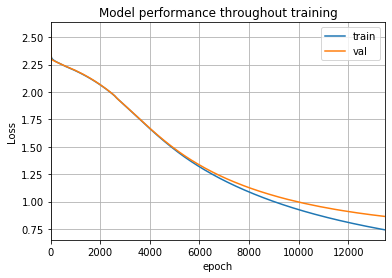

In [21]:
import pandas as pd

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [22]:
pred_val = model.predict(X_val)
pred_val

array([[4.12006302e-05, 1.19412295e-03, 1.09493822e-05, ...,
        1.68191940e-01, 7.59260077e-03, 8.07669945e-03],
       [8.48043263e-01, 1.79740414e-03, 3.67724672e-02, ...,
        9.94626782e-04, 3.68184177e-04, 7.01885447e-02],
       [3.04306019e-03, 3.14966589e-01, 3.63114811e-02, ...,
        4.40800749e-02, 5.32266125e-02, 2.77512497e-03],
       ...,
       [2.87816918e-04, 2.25089919e-02, 2.79599597e-04, ...,
        2.78908670e-01, 4.05492745e-02, 4.66788188e-03],
       [7.67088670e-04, 1.50069920e-02, 3.56984237e-04, ...,
        5.42864157e-03, 2.01437362e-02, 1.25661185e-02],
       [3.78820812e-04, 2.51073036e-02, 1.45665277e-03, ...,
        6.90547302e-02, 8.45746636e-01, 5.45055547e-04]], dtype=float32)

In [23]:
df_pred_val = DataFrame(pred_val, columns=[x for x in range(10)])
df_pred_val.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000041,0.001194,0.000011,0.588916,0.028435,0.000493,0.197049,0.168192,0.007593,0.008077
1,0.848043,0.001797,0.036772,0.017841,0.020741,0.000042,0.003212,0.000995,0.000368,0.070189
2,0.003043,0.314967,0.036311,0.080629,0.012277,0.052490,0.400200,0.044080,0.053227,0.002775
3,0.943297,0.000120,0.032143,0.000494,0.006304,0.000002,0.000095,0.000021,0.000003,0.017521
4,0.104262,0.000394,0.039303,0.045294,0.004082,0.001696,0.012383,0.016053,0.003311,0.773223


In [24]:
df_pred_val['class_pred']=(df_pred_val[range(10)].idxmax(axis=1)).astype('int')
df_pred_val.head()

,0,1,2,3,4,5,6,7,8,9,class_pred
0,0.000041,0.001194,0.000011,0.588916,0.028435,0.000493,0.197049,0.168192,0.007593,0.008077,3
1,0.848043,0.001797,0.036772,0.017841,0.020741,0.000042,0.003212,0.000995,0.000368,0.070189,0
2,0.003043,0.314967,0.036311,0.080629,0.012277,0.052490,0.400200,0.044080,0.053227,0.002775,6
3,0.943297,0.000120,0.032143,0.000494,0.006304,0.000002,0.000095,0.000021,0.000003,0.017521,0
4,0.104262,0.000394,0.039303,0.045294,0.004082,0.001696,0.012383,0.016053,0.003311,0.773223,9


In [25]:
y_pred_val = df_pred_val['class_pred'].to_numpy()
y_pred_val = y_pred_val.reshape(-1,1)

In [26]:
y_pred_val.shape

(413, 1)

In [27]:
y_val.shape

(413, 1)

## Evaluate NN

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred_val)

0.7288135593220338

# Model CNN

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout #create model

model_CNN = Sequential() #add model layers

model_CNN.add(Conv2D(4, kernel_size=3, 
                     activation='relu', 
                     input_shape=(64,64,1), 
                     kernel_initializer='glorot_normal'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Conv2D(8, kernel_size=3, 
                     activation='relu', 
                     kernel_initializer='glorot_normal'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Flatten())
model_CNN.add(Dense(32, activation='relu'))
model_CNN.add(Dropout(0.2))
model_CNN.add(Dense(16, activation='relu'))
model_CNN.add(Dropout(0.2))
model_CNN.add(Dense(10, activation='softmax'))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [30]:
model_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 4)         40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 8)         296       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                50208     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
__________

In [31]:
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop

model_CNN.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=Adam(lr=LEARNING_RATE)) #optimizer=SGD(lr=LEARNING_RATE), optimizer=Adam(lr=LEARNING_RATE)

In [32]:
X_train_CNN, X_val_CNN, y_train_CNN, y_val_CNN = train_test_split(X, Y_flat, test_size=0.2)
X_train_CNN.shape

(1649, 64, 64)

In [33]:
X_val_CNN.shape

(413, 64, 64)

In [34]:
y_train_CNN.shape

(1649, 1)

In [35]:
X_train_CNN_reshape = X_train_CNN.reshape(1649,64,64,1)
X_train_CNN_reshape.shape

(1649, 64, 64, 1)

In [36]:
X_val_CNN_reshape = X_val_CNN.reshape(413,64,64,1)
X_val_CNN_reshape.shape

(413, 64, 64, 1)

In [37]:
history_CNN = model_CNN.fit(X_train_CNN_reshape,
                            y_train_CNN,
                            validation_data=(X_val_CNN_reshape, y_val_CNN),
                            epochs=500,
                            batch_size=BATCH_SIZE,
                            verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1649 samples, validate on 413 samples
Epoch 1/500





1649/1649 [==============================] - 4s 2ms/step - loss: 2.3009 - val_loss: 2.2981
Epoch 2/500
1649/1649 [==============================] - 2s 1ms/step - loss: 2.2988 - val_loss: 2.2961
Epoch 3/500
1649/1649 [==============================] - 2s 1ms/step - loss: 2.2951 - val_loss: 2.2938
Epoch 4/500
1649/1649 [==============================] - 2s 1ms/step - loss: 2.2943 - val_loss: 2.2907
Epoch 5/500
1649/1649 [==============================] - 2s 1ms/step - loss: 2.2907 - val_loss: 2.2865
Epoch 6/500
1649/1649 [==============================] - 2s 1ms/step - loss: 2.2845 - val_loss: 2.2829
Epoch 7/500
1649/1649 [==============================] - 2s 1ms/step - loss: 2.2839 - val_loss: 2.2787
Epoch 8/500
1649/1649 [==============================] - 2s 1ms/step - loss: 2.2752 - val_loss: 2.2741
Epoch 9/500
1649/1649 [====

Epoch 61/500
1649/1649 [==============================] - 2s 1ms/step - loss: 1.6651 - val_loss: 1.4856
Epoch 62/500
1649/1649 [==============================] - 2s 1ms/step - loss: 1.6323 - val_loss: 1.4686
Epoch 63/500
1649/1649 [==============================] - 2s 1ms/step - loss: 1.6199 - val_loss: 1.4478
Epoch 64/500
1649/1649 [==============================] - 2s 1ms/step - loss: 1.6355 - val_loss: 1.4260
Epoch 65/500
1649/1649 [==============================] - 2s 1ms/step - loss: 1.5982 - val_loss: 1.4055
Epoch 66/500
1649/1649 [==============================] - 2s 1ms/step - loss: 1.5889 - val_loss: 1.3854
Epoch 67/500
1649/1649 [==============================] - 2s 1ms/step - loss: 1.5520 - val_loss: 1.3613
Epoch 68/500
1649/1649 [==============================] - 2s 1ms/step - loss: 1.5529 - val_loss: 1.3381
Epoch 69/500
1649/1649 [==============================] - 2s 1ms/step - loss: 1.5291 - val_loss: 1.3118
Epoch 70/500
1649/1649 [==============================] - 2s 1ms

Epoch 140/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.9109 - val_loss: 0.6954
Epoch 141/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.9003 - val_loss: 0.6949
Epoch 142/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.8990 - val_loss: 0.6953
Epoch 143/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.9093 - val_loss: 0.6895
Epoch 144/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.8674 - val_loss: 0.6799
Epoch 145/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.8943 - val_loss: 0.6852
Epoch 146/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.8869 - val_loss: 0.6727
Epoch 147/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.9022 - val_loss: 0.6839
Epoch 148/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.8605 - val_loss: 0.6731
Epoch 149/500
1649/1649 [==============================

1649/1649 [==============================] - 2s 1ms/step - loss: 0.6302 - val_loss: 0.5010
Epoch 219/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.6356 - val_loss: 0.4983
Epoch 220/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.6209 - val_loss: 0.4966
Epoch 221/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.6245 - val_loss: 0.4974
Epoch 222/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.5929 - val_loss: 0.4997
Epoch 223/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.6034 - val_loss: 0.4987
Epoch 224/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.5970 - val_loss: 0.4925
Epoch 225/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.5849 - val_loss: 0.4884
Epoch 226/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.5788 - val_loss: 0.4940
Epoch 227/500
1649/1649 [==============================] - 2s 1ms/ste

Epoch 297/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.4383 - val_loss: 0.4347
Epoch 298/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.4503 - val_loss: 0.4353
Epoch 299/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.4621 - val_loss: 0.4328
Epoch 300/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.4462 - val_loss: 0.4304
Epoch 301/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.4416 - val_loss: 0.4253
Epoch 302/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.4370 - val_loss: 0.4237
Epoch 303/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.4499 - val_loss: 0.4266
Epoch 304/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.4805 - val_loss: 0.4259
Epoch 305/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.4486 - val_loss: 0.4317
Epoch 306/500
1649/1649 [==============================

1649/1649 [==============================] - 2s 1ms/step - loss: 0.3526 - val_loss: 0.4059
Epoch 376/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.3720 - val_loss: 0.4055
Epoch 377/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.3503 - val_loss: 0.4017
Epoch 378/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.3575 - val_loss: 0.3981
Epoch 379/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.3720 - val_loss: 0.4061
Epoch 380/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.3865 - val_loss: 0.4081
Epoch 381/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.3446 - val_loss: 0.4085
Epoch 382/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.3433 - val_loss: 0.4094
Epoch 383/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.3483 - val_loss: 0.4144
Epoch 384/500
1649/1649 [==============================] - 2s 1ms/ste

Epoch 454/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.3143 - val_loss: 0.4003
Epoch 455/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.3121 - val_loss: 0.3979
Epoch 456/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.3138 - val_loss: 0.3977
Epoch 457/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.2944 - val_loss: 0.4008
Epoch 458/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.2825 - val_loss: 0.4035
Epoch 459/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.2931 - val_loss: 0.4017
Epoch 460/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.2847 - val_loss: 0.4082
Epoch 461/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.2942 - val_loss: 0.4124
Epoch 462/500
1649/1649 [==============================] - 2s 1ms/step - loss: 0.2964 - val_loss: 0.4158
Epoch 463/500
1649/1649 [==============================

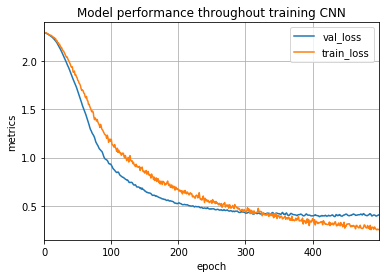

In [38]:
pd.DataFrame(history_CNN.history).plot()
plt.grid(True)
plt.title('Model performance throughout training CNN')
plt.ylabel('metrics')
plt.xlabel('epoch')
plt.legend(['val_loss', 'train_loss'], loc='upper right')
plt.show()

In [39]:
CNN_pred_val = model_CNN.predict(X_val_CNN_reshape)
CNN_pred_val

array([[1.26810360e-03, 2.30774353e-03, 6.69359579e-04, ...,
        1.09627284e-02, 1.59045588e-02, 2.06770026e-03],
       [2.48534558e-03, 5.67361967e-05, 1.14580216e-04, ...,
        3.11375759e-03, 1.84814766e-04, 9.92223203e-01],
       [3.54178582e-07, 1.69339211e-04, 9.91369802e-07, ...,
        9.94836330e-01, 1.70246878e-07, 2.89384370e-05],
       ...,
       [6.77999333e-06, 4.12648398e-04, 5.70498878e-06, ...,
        2.39896744e-01, 1.44272872e-05, 8.94203768e-05],
       [1.58228218e-07, 5.94598387e-05, 6.52080416e-08, ...,
        3.11171924e-08, 9.99929309e-01, 9.75635928e-08],
       [9.21035409e-01, 5.28371402e-06, 2.44506547e-04, ...,
        2.64524169e-06, 6.87478896e-05, 7.40755498e-02]], dtype=float32)

In [40]:
df_CNN_pred_val = DataFrame(CNN_pred_val, columns=[x for x in range(10)])
df_CNN_pred_val.head()

,0,1,2,3,4,5,6,7,8,9
0,1.268104e-03,0.002308,6.693596e-04,0.009252,0.952191,0.005175,2.005551e-04,0.010963,1.590456e-02,2.067700e-03
1,2.485346e-03,0.000057,1.145802e-04,0.001528,0.000141,0.000151,1.366096e-06,0.003114,1.848148e-04,9.922232e-01
2,3.541786e-07,0.000169,9.913698e-07,0.003123,0.001797,0.000009,3.537087e-05,0.994836,1.702469e-07,2.893844e-05
3,3.806980e-04,0.000004,8.274437e-06,0.000089,0.000002,0.000009,1.783595e-08,0.000624,1.377096e-05,9.988702e-01
4,9.162663e-06,0.910896,3.177526e-03,0.000003,0.000045,0.082137,5.985080e-04,0.002497,6.351717e-04,4.734875e-07


In [41]:
df_CNN_pred_val['class_CNN_pred']=(df_CNN_pred_val[range(10)].idxmax(axis=1)).astype('int')
df_CNN_pred_val.head()

,0,1,2,3,4,5,6,7,8,9,class_CNN_pred
0,1.268104e-03,0.002308,6.693596e-04,0.009252,0.952191,0.005175,2.005551e-04,0.010963,1.590456e-02,2.067700e-03,4
1,2.485346e-03,0.000057,1.145802e-04,0.001528,0.000141,0.000151,1.366096e-06,0.003114,1.848148e-04,9.922232e-01,9
2,3.541786e-07,0.000169,9.913698e-07,0.003123,0.001797,0.000009,3.537087e-05,0.994836,1.702469e-07,2.893844e-05,7
3,3.806980e-04,0.000004,8.274437e-06,0.000089,0.000002,0.000009,1.783595e-08,0.000624,1.377096e-05,9.988702e-01,9
4,9.162663e-06,0.910896,3.177526e-03,0.000003,0.000045,0.082137,5.985080e-04,0.002497,6.351717e-04,4.734875e-07,1


In [42]:
y_CNN_pred_val = df_CNN_pred_val['class_CNN_pred'].to_numpy()
y_CNN_pred_val = y_CNN_pred_val.reshape(-1,1)

In [43]:
y_pred_val.shape

(413, 1)

In [44]:
y_val.shape

(413, 1)

## Evaluate CNN

In [45]:
accuracy_score(y_val_CNN, y_CNN_pred_val)

0.8886198547215496

# Model Keras Application :
## Transfert Learning

In [46]:
from keras.applications import *
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout #create model
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop
import pandas as pd

In [47]:
X_Train_VGG16 = np.stack((X_train_CNN,X_train_CNN,X_train_CNN), axis=3)
X_Train_VGG16.shape

(1649, 64, 64, 3)

In [48]:
X_val_VGG16 = np.stack((X_val_CNN,X_val_CNN,X_val_CNN), axis=3)
X_val_VGG16.shape

(413, 64, 64, 3)

In [49]:
def tl_cnn(app_keras):
    model = Sequential() #add model layers
    model.add(app_keras(include_top=False, 
                            weights='imagenet', 
                            input_tensor=None, 
                            input_shape=(64,64,3), 
                            pooling=max, 
                            classes=10))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    print(model.summary())
    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=RMSprop(lr=LEARNING_RATE), 
                  metrics = ['accuracy'])
    history = model.fit(X_Train_VGG16,
                            y_train_CNN,
                            validation_data=(X_val_VGG16, y_val_CNN),
                            epochs=20,
                            batch_size=BATCH_SIZE,
                            verbose=2)
    pd.DataFrame(history.history).plot()
    plt.grid(True)
    plt.title('Model performance throughout training CNN')
    plt.ylabel('metrics')
    plt.xlabel('epoch')
    plt.legend(['val_loss', 'val_acc', 'train_loss', 'train_acc'], loc='upper right')
    plt.show()
    return model

In [50]:
# tl_cnn(model_VGG16, VGG16)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 2, 2, 1024)        3228864   
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                131104    
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                170       
Total para

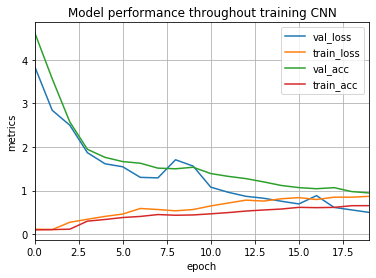

In [51]:
model_MobileNet = tl_cnn(MobileNet)